### Cardiovascular Disease(심혈관질환)

#### 혈압 상태 예측

- ID: 환자마다 고유한 식별자입니다.
- age: 일 단위로 환자의 나이.
- age_years: 환자의 나이(년 단위).
- gender: 환자의 성별. 범주형 변수(1: 여성, 2: 남성).
- height: 환자의 키(cm 단위).
- weight : 환자의 체중(kg 단위).
- ap_hi: 수축기 혈압.
- ap_lo: 이완기 혈압.
- cholesterol: 콜레스테롤 수치. 범주형 변수(1: 보통, 2: 보통 이상, 3: 보통 이상).
- gluc: 포도당 수치. 범주형 변수(1: 정상, 2: 정상 이상, 3: 정상 이상).
- smoke: 흡연 여부. 이항 변수(0: 비흡연자, 1: 흡연자).
- alco: 알코올 섭취량. 이항 변수 (0: 알코올 섭취량 없음, 1: 알코올 섭취량).
- active: Physical activity. 이진 변수(0: Physical active가 아님, 1: Physical active).
- cardio: 심혈관질환 유무. 대상 변수. 이항(0: 부재, 1: 부재).
- bmi: 체중과 키에서 파생된 체질량 지수. 
- bp_category : ap_hi, ap_lo 기준 혈압 카테고리로 '정상', '상승', '고혈압 1기', '고혈압 2기'가 있습니다.
- bp_category_encoded : 기계학습 목적으로 bp_category를 부호화한 형태.


In [1]:
import pandas as pd

cardio_df = pd.read_csv('./datasets/cardio_data_processed.csv')
display(cardio_df)
cardio_df.info()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68200,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,52,26.927438,Hypertension Stage 1,Hypertension Stage 1
68201,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,61,50.472681,Hypertension Stage 2,Hypertension Stage 2
68202,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52,31.353579,Hypertension Stage 2,Hypertension Stage 2
68203,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61,27.099251,Hypertension Stage 1,Hypertension Stage 1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68205 entries, 0 to 68204
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   68205 non-null  int64  
 1   age                  68205 non-null  int64  
 2   gender               68205 non-null  int64  
 3   height               68205 non-null  int64  
 4   weight               68205 non-null  float64
 5   ap_hi                68205 non-null  int64  
 6   ap_lo                68205 non-null  int64  
 7   cholesterol          68205 non-null  int64  
 8   gluc                 68205 non-null  int64  
 9   smoke                68205 non-null  int64  
 10  alco                 68205 non-null  int64  
 11  active               68205 non-null  int64  
 12  cardio               68205 non-null  int64  
 13  age_years            68205 non-null  int64  
 14  bmi                  68205 non-null  float64
 15  bp_category          68205 non-null 

#### 결측치 검사

In [2]:
cardio_df.isna().sum()

id                     0
age                    0
gender                 0
height                 0
weight                 0
ap_hi                  0
ap_lo                  0
cholesterol            0
gluc                   0
smoke                  0
alco                   0
active                 0
cardio                 0
age_years              0
bmi                    0
bp_category            0
bp_category_encoded    0
dtype: int64

#### 중복행 검사

In [3]:
cardio_df.duplicated().sum()


0

In [4]:
cardio_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,68205.0,49972.410498,28852.138290,0.000000,24991.000000,50008.000000,74878.000000,99999.000000
age,68205.0,19462.667737,2468.381854,10798.000000,17656.000000,19700.000000,21323.000000,23713.000000
gender,68205.0,1.348625,0.476539,1.000000,1.000000,1.000000,2.000000,2.000000
height,68205.0,164.372861,8.176756,55.000000,159.000000,165.000000,170.000000,250.000000
weight,68205.0,74.100688,14.288862,11.000000,65.000000,72.000000,82.000000,200.000000
ap_hi,68205.0,126.434924,15.961685,90.000000,120.000000,120.000000,140.000000,180.000000
ap_lo,68205.0,81.263925,9.143985,60.000000,80.000000,80.000000,90.000000,120.000000
cholesterol,68205.0,1.363243,0.678080,1.000000,1.000000,1.000000,1.000000,3.000000
gluc,68205.0,1.225174,0.571288,1.000000,1.000000,1.000000,1.000000,3.000000
smoke,68205.0,0.087662,0.282805,0.000000,0.000000,0.000000,0.000000,1.000000


### bp_category의 Normal, Elevated, Hypertension Stage 1, Hypertension Stage 2 값 들을  0, 1 값으로 변경

In [5]:
print(cardio_df['bp_category'].unique())

# id, age, bp_category_encoded, cardio 컬럼 제거

cardio_df=cardio_df.drop(columns=['id', 'age', 'bp_category_encoded', 'cardio'],axis=1)

# bp_category의 Normal, Elevated, Hypertension Stage 1, Hypertension Stage 2 값 들을 0, 1 값으로 변경
replacement_dict = {
    'Normal': 0,
    'Elevated': 0,
    'Hypertension Stage 1': 1,
    'Hypertension Stage 2': 1
}

cardio_df['bp_category'] = cardio_df['bp_category'].replace(replacement_dict)

cardio_df['bp_category'].value_counts()


# gender 1,2 값을 0,1로 바꾸기
cardio_df['gender'] = cardio_df['gender'].replace({1: 0, 2: 1})

# 열 이름 바꾸기
cardio_df = cardio_df.rename(columns={'gender': 'sex'})
cardio_df = cardio_df.rename(columns={'age_years': 'age'})
cardio_df = cardio_df.rename(columns={'smoke': 'is_smoking'})
cardio_df = cardio_df.rename(columns={'ap_hi': 'sysBP'})
cardio_df = cardio_df.rename(columns={'ap_lo': 'diaBP'})
cardio_df = cardio_df.rename(columns={'bmi': 'BMI'})
cardio_df = cardio_df.rename(columns={'bp_category': 'prevalentHyp'})


['Hypertension Stage 1' 'Hypertension Stage 2' 'Normal' 'Elevated']


In [6]:

cardio_df = cardio_df[['age', 'sex', 'is_smoking', 'sysBP', 'diaBP', 'BMI', 'prevalentHyp']]
cardio_df

,age,sex,is_smoking,sysBP,diaBP,BMI,prevalentHyp
0,50,1,0,110,80,21.967120,1
1,55,0,0,140,90,34.927679,1
2,51,0,0,130,70,23.507805,1
3,48,1,0,150,100,28.710479,1
4,47,0,0,100,60,23.011177,0
...,...,...,...,...,...,...,...
68200,52,1,1,120,80,26.927438,1
68201,61,0,0,140,90,50.472681,1
68202,52,1,0,180,90,31.353579,1
68203,61,0,0,135,80,27.099251,1


##### 상관 관계 분석

Text(0.5, 1.0, 'Correlation')

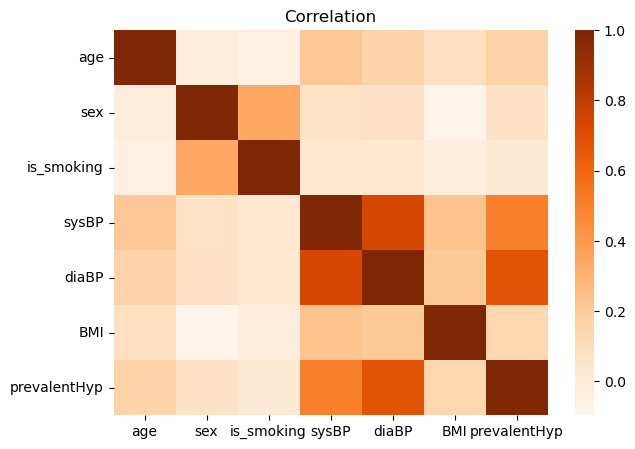

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt


corr = cardio_df.corr()
fig = plt.figure(figsize=(7, 5))
heatmap = sns.heatmap(corr, cmap="Oranges")
heatmap.set_title("Correlation")

In [8]:
# 1. 상관관계 수치를 내림차순 정렬
# 2. 첫 번째 행 추출(가장 수치가 높은 데이터의 행)
# 3. 내림차순 정렬(상관 관계가 높은 순)

corr.sort_values(by="prevalentHyp", ascending=False).iloc[0].sort_values(ascending=False)

prevalentHyp    1.000000
diaBP           0.674317
sysBP           0.506011
age             0.162863
BMI             0.136536
sex             0.068520
is_smoking      0.011565
Name: prevalentHyp, dtype: float64

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>],
       [<Axes: title={'center': 'is_smoking'}>,
        <Axes: title={'center': 'sysBP'}>],
       [<Axes: title={'center': 'diaBP'}>,
        <Axes: title={'center': 'BMI'}>]], dtype=object)

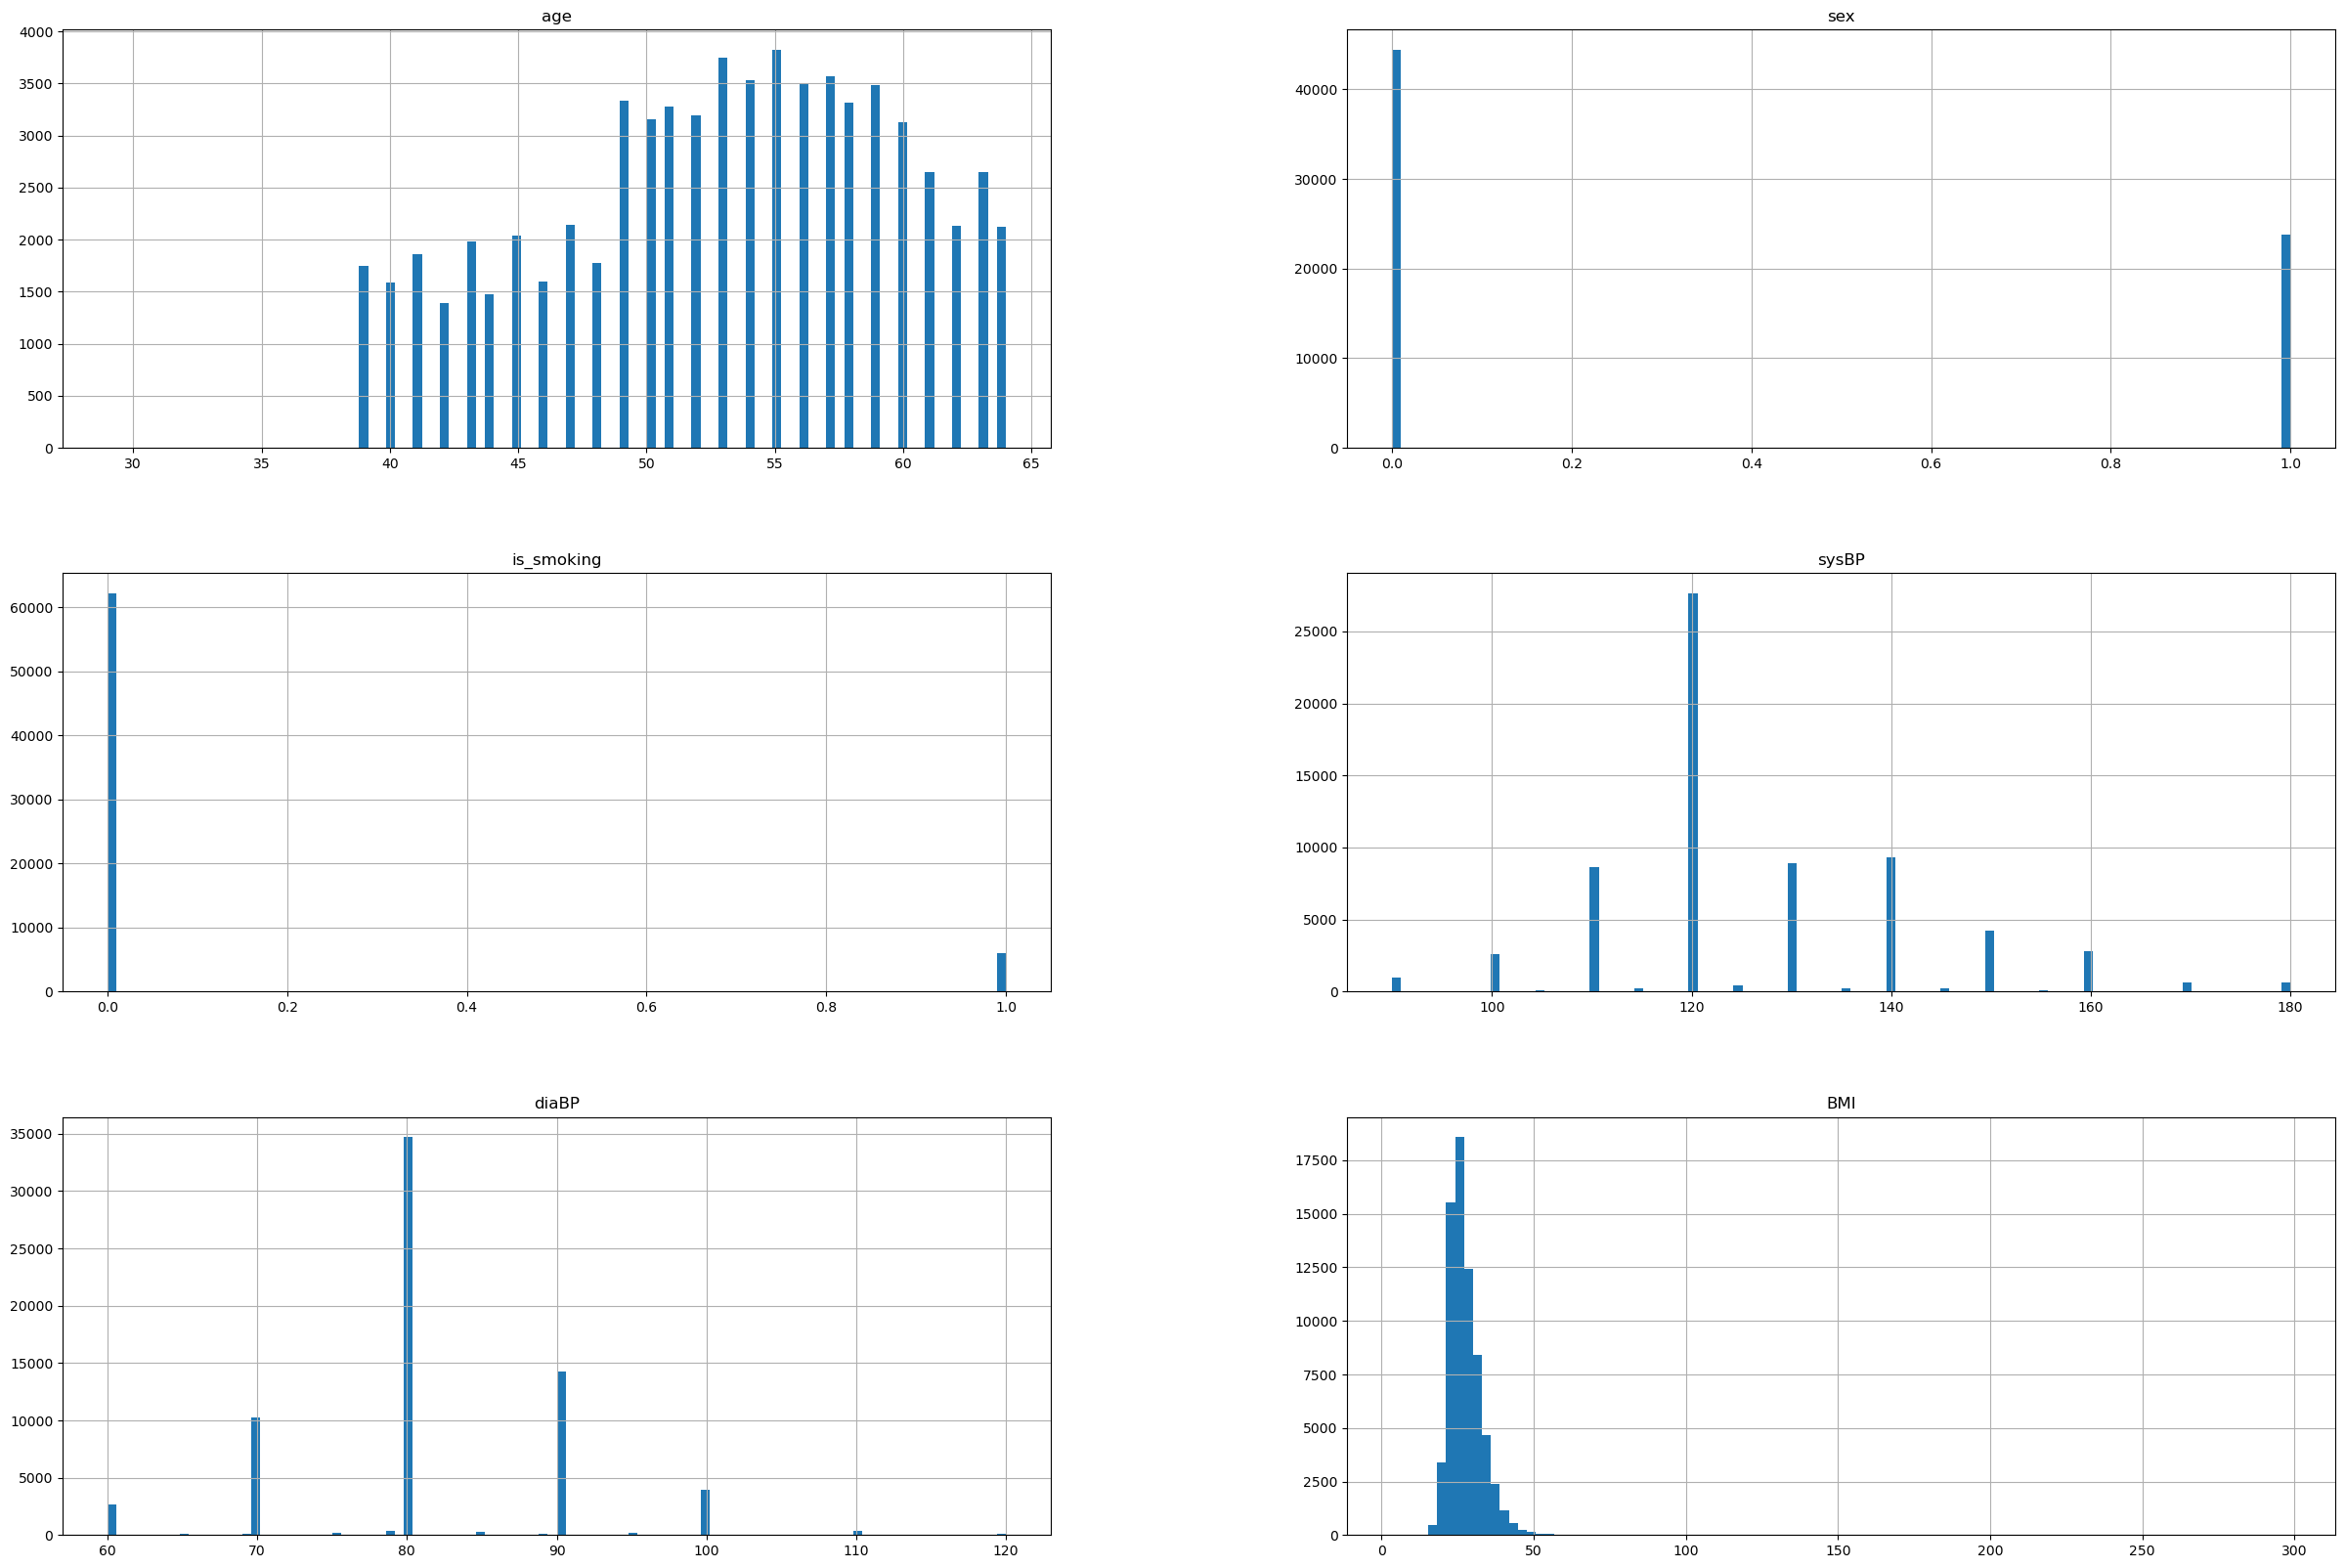

In [9]:
cardio_df.iloc[:, :-1].hist(figsize=(30, 20), bins=100)

##### 표준화를 통한 이상치 제거
- 표준화된 값이 평균을 기준으로 떨어져 있는 거리이므로, ±1.96 범위를 벗어난다면 이상치에 포함된다.  
- 상관 관계 비중이 높은 ap_lo, ap_hi, cardio, weight, age_years, bmi, cholesterol 대해 이상치를 제거한다.

In [10]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
cardio_scaled = scale.fit_transform(cardio_df)
cardio_scaled_df = pd.DataFrame(cardio_scaled, columns=cardio_df.columns)

In [11]:
columns = ['sysBP','BMI']

for column in columns:
    print(f'{column}: {cardio_scaled_df[~cardio_scaled_df[column].between(-1.96, 1.96)].shape[0]}건')

sysBP: 5144건
BMI: 2102건


In [12]:
columns = ['sysBP','BMI']
for column in columns:
    cardio_scaled_df.drop(cardio_scaled_df[~cardio_scaled_df[column].between(-1.96, 1.96)][column].index, axis=0, inplace=True)

for column in columns:
    print(f'{column}: {cardio_scaled_df[~cardio_scaled_df[column].between(-1.96, 1.96)].shape[0]}건')

sysBP: 0건
BMI: 0건


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>],
       [<Axes: title={'center': 'is_smoking'}>,
        <Axes: title={'center': 'sysBP'}>],
       [<Axes: title={'center': 'diaBP'}>,
        <Axes: title={'center': 'BMI'}>]], dtype=object)

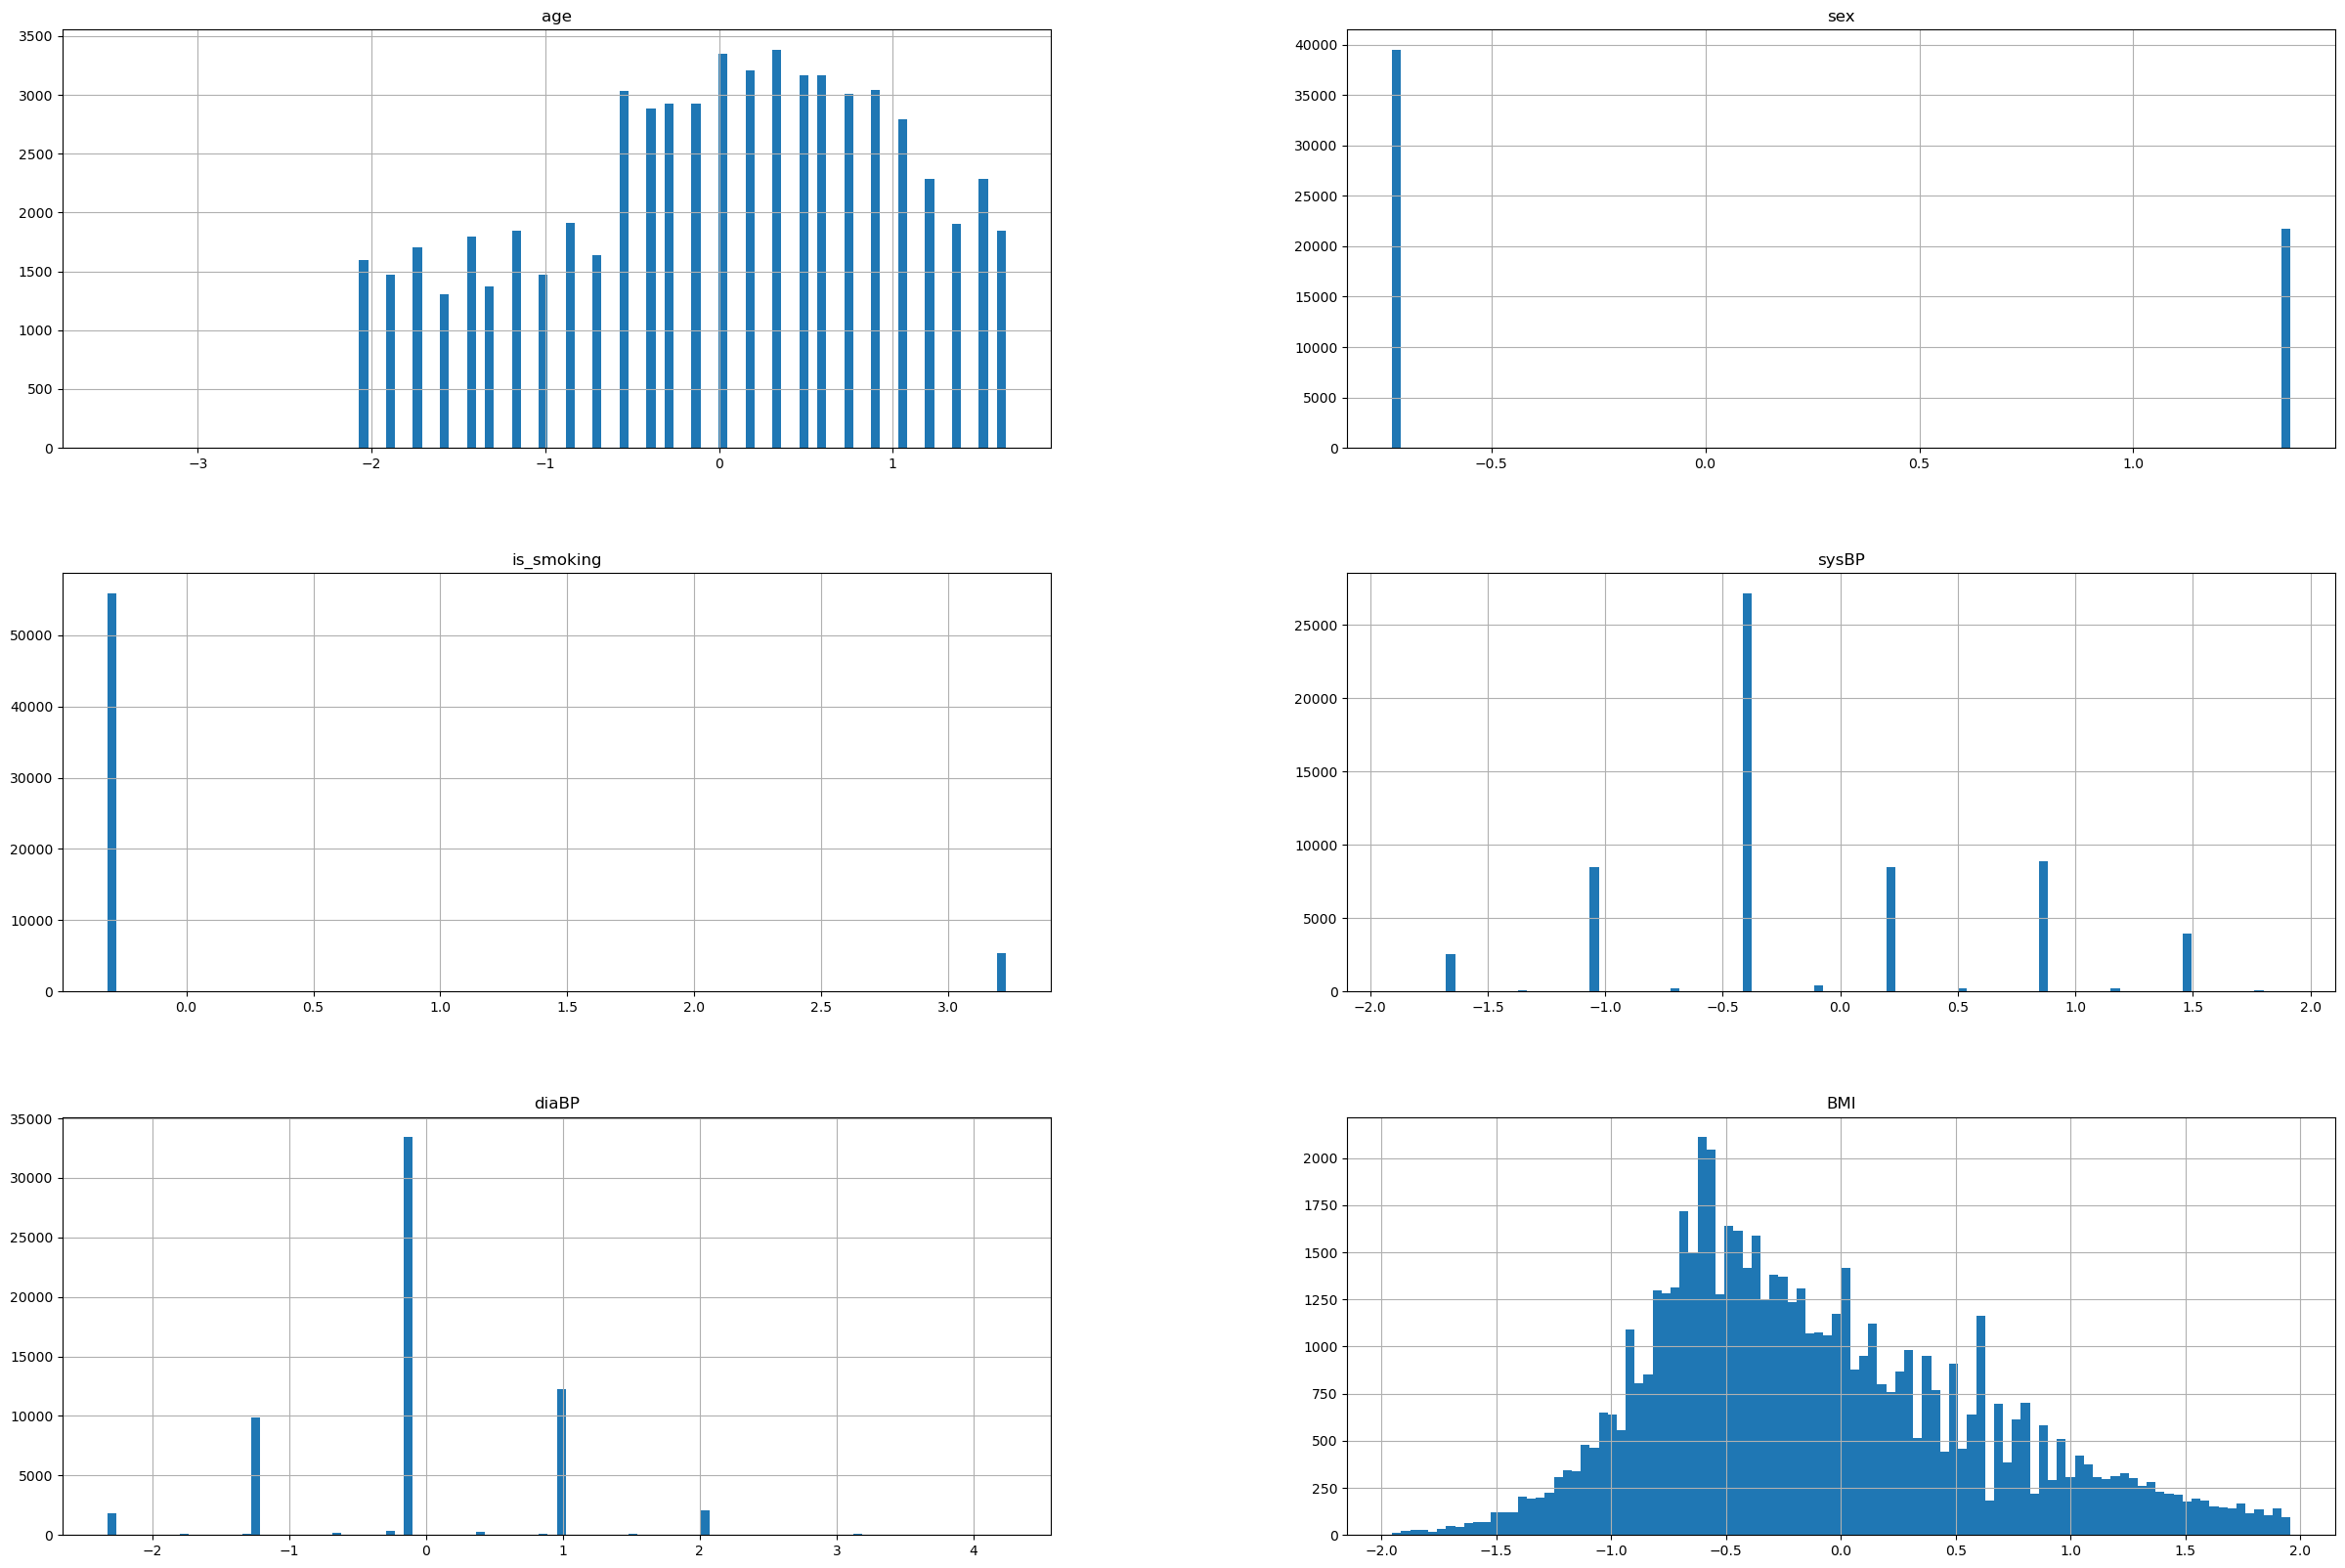

In [13]:
cardio_scaled_df.iloc[:, :-1].hist(figsize=(30, 20), bins=100)

#### cardio_df = cardio_df.iloc[cardio_scaled_df.index, :].reset_index(drop=True)
cardio_df

#### 정규화

In [15]:
from sklearn.preprocessing import MinMaxScaler

features, targets = cardio_df.iloc[:, :-1], cardio_df.prevalentHyp

cardio_scaled = MinMaxScaler().fit_transform(features)
cardio_scaled_df = pd.DataFrame(cardio_scaled, columns=features.columns)
cardio_scaled_df

,age,sex,is_smoking,sysBP,diaBP,BMI
0,0.600000,1.0,0.0,0.229508,0.333333,0.264262
1,0.742857,0.0,0.0,0.721311,0.500000,0.814339
2,0.628571,0.0,0.0,0.557377,0.166667,0.329652
3,0.542857,1.0,0.0,0.885246,0.666667,0.550466
4,0.514286,0.0,0.0,0.065574,0.000000,0.308574
...,...,...,...,...,...,...
61286,0.685714,0.0,0.0,0.557377,0.500000,0.336173
61287,0.800000,0.0,0.0,0.885246,0.333333,0.579084
61288,0.657143,1.0,1.0,0.393443,0.333333,0.474790
61289,0.914286,0.0,0.0,0.639344,0.333333,0.482082


In [16]:
cardio_scaled_df['prevalentHyp'] = cardio_df['prevalentHyp']
cardio_scaled_df

,age,sex,is_smoking,sysBP,diaBP,BMI,prevalentHyp
0,0.600000,1.0,0.0,0.229508,0.333333,0.264262,1
1,0.742857,0.0,0.0,0.721311,0.500000,0.814339,1
2,0.628571,0.0,0.0,0.557377,0.166667,0.329652,1
3,0.542857,1.0,0.0,0.885246,0.666667,0.550466,1
4,0.514286,0.0,0.0,0.065574,0.000000,0.308574,0
...,...,...,...,...,...,...,...
61286,0.685714,0.0,0.0,0.557377,0.500000,0.336173,1
61287,0.800000,0.0,0.0,0.885246,0.333333,0.579084,1
61288,0.657143,1.0,1.0,0.393443,0.333333,0.474790,1
61289,0.914286,0.0,0.0,0.639344,0.333333,0.482082,1


#### 타겟 분포를 최소 타겟수 11426개로 맞춰주기

In [17]:
print(cardio_scaled_df.prevalentHyp.value_counts())


Hypertension = cardio_scaled_df[cardio_scaled_df.prevalentHyp == 1].sample(11426)
Normal = cardio_scaled_df[cardio_scaled_df.prevalentHyp == 0]

balance_cardio_df = pd.concat([Hypertension, Normal])

balance_cardio_df.prevalentHyp.value_counts()

prevalentHyp
1    49865
0    11426
Name: count, dtype: int64


prevalentHyp
1    11426
0    11426
Name: count, dtype: int64

In [18]:
balance_cardio_df.reset_index(drop=True, inplace=True)
balance_cardio_df

,age,sex,is_smoking,sysBP,diaBP,BMI,prevalentHyp
0,0.685714,0.0,0.0,0.393443,0.333333,0.326077,1
1,0.828571,0.0,0.0,0.557377,0.333333,0.326669,1
2,0.571429,1.0,0.0,0.721311,0.500000,0.907620,1
3,0.571429,1.0,0.0,0.393443,0.333333,0.506801,1
4,0.885714,0.0,0.0,0.393443,0.333333,0.338312,1
...,...,...,...,...,...,...,...
22847,0.457143,0.0,0.0,0.229508,0.250000,0.150613,0
22848,0.485714,0.0,0.0,0.393443,0.316667,0.459752,0
22849,0.885714,0.0,0.0,0.229508,0.166667,0.310090,0
22850,0.800000,0.0,0.0,0.393443,0.166667,0.761077,0


##### feature별 중요도 확인하기

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

decision_tree_classifier = DecisionTreeClassifier()

features, targets = balance_cardio_df.iloc[:, :-1], balance_cardio_df.prevalentHyp
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2)

decision_tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

age, 0.0
sex, 0.0
is_smoking, 0.0
sysBP, 0.046
diaBP, 0.954
BMI, 0.0


<Axes: ylabel='None'>

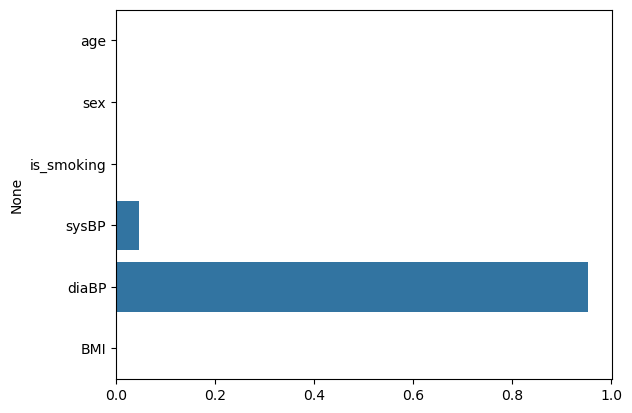

In [20]:
import seaborn as sns
import numpy as np

for name, value in zip(features.columns, decision_tree_classifier.feature_importances_):
    print(f'{name}, {round(value, 4)}')
    
sns.barplot(x=decision_tree_classifier.feature_importances_, y=features.columns)

##### 과적합 확인하기

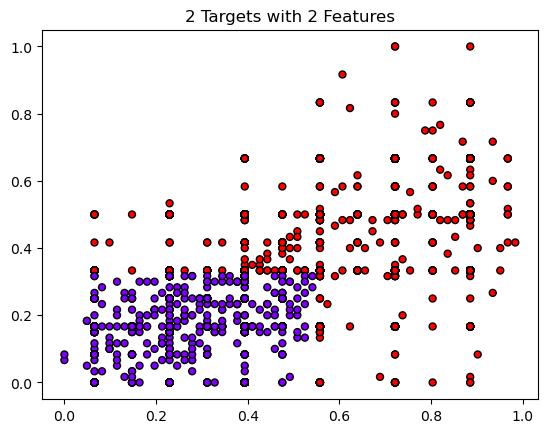

In [21]:
import matplotlib.pyplot as plt

plt.title('2 Targets with 2 Features')
plt.scatter(features.iloc[:, 3], features.iloc[:, 4], marker='o', c=targets, s=25, cmap="rainbow", edgecolors='k')

In [22]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow',
                           zorder=1)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


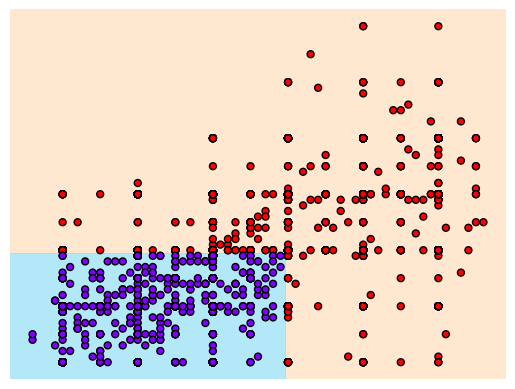

In [23]:
from sklearn.tree import DecisionTreeClassifier

# 2개의 feature만 사용하기 때문에 중요도가 높은 순으로 2개를 분리한다.
features = features.iloc[:, [3, 4]]

decision_tree_classifier = DecisionTreeClassifier().fit(features, targets)

visualize_boundary(decision_tree_classifier, features, targets)

### 보팅(Voting)

##### VotingClassifier(n_estimators, voting)

###### n_estimators  
- 추가할 모델 객체를 list형태로 전달한다.
- 예시) [('DTC',grid_dt_classifier),('SVC',grid_sv_classifier), ('KNN', grid_knn_classifier)]

###### voting
- soft, hard 중 선택한다.
- default: 'hard'

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
import time

# 하이퍼 파라미터 튜닝
dt_params = {'max_depth': [5, 6, 7], 'min_samples_split': [7, 8, 9]}
svm_params = {'C': [ 0.01, 0.1, 1, 10],
             'gamma': [0.01, 0.1, 1, 10],
             'kernel': ['linear', 'rbf']}
knn_params = {'n_neighbors': [3, 5, 7, 9]}

grid_dt_classifier = GridSearchCV(DecisionTreeClassifier(), param_grid=dt_params, cv=5, refit=True, return_train_score=True, n_jobs=3, error_score='raise')
# 소프트 보팅에서는 각 결정 클래스별 확률이 필요하기 때문에, SVC에 probability를 True로 하여
# predict_proba()를 사용할 수 있도록 해준다
grid_svc_classifier = GridSearchCV(SVC(probability=True), param_grid=svm_params, cv=5, refit=True, return_train_score=True, n_jobs=3, error_score='raise')
# KNN에서 Flag오류 발생
# Series 타입의 훈련 데이터에는 flags 속성이 없기 때문에, numpy로 변경한 뒤 훈련시켜야 한다.
grid_knn_classifier = GridSearchCV(KNeighborsClassifier(), param_grid=knn_params, cv=5, refit=True, return_train_score=True, n_jobs=3, error_score='raise')


start_time = time.time()
voting_classifier = VotingClassifier(estimators=[('DTC', grid_dt_classifier)
                                                 , ('SVC', grid_svc_classifier)
                                                 , ('KNN', grid_knn_classifier)]
                                     , voting='hard')




# voting_classifier = VotingClassifier(estimators=[('DTC', grid_dt_classifier)
#                                                  , ('SVC', grid_svc_classifier)
#                                                  , ('KNN', grid_knn_classifier)]
#                                      , voting='soft')

# 데이터 세트 분리
features, targets = balance_cardio_df.iloc[:, :-1], balance_cardio_df.prevalentHyp

X_train, X_test, y_train, y_test = train_test_split(features, targets, stratify=targets, test_size=0.2)

# VotingClassifier 학습/예측/평가
voting_classifier.fit(X_train, y_train)

end_time = time.time()

# 소요된 시간 출력
elapsed_time = end_time - start_time
print(f"GridSearchCV 소요 시간: {elapsed_time} 초")

GridSearchCV 소요 시간: 1330.6885395050049 초


In [25]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix, ConfusionMatrixDisplay, f1_score, roc_auc_score
# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction, average='macro')
#     재현율
    recall = recall_score(y_test , prediction, average='macro')
#     F1 score
    f1 = f1_score(y_test, prediction, average='macro')
#     ROC-AUC
#     roc_auc = roc_auc_score(y_test, prediction)

    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy , precision ,recall, f1))
    print("#" * 75)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

오차 행렬
[[2272   14]
 [   0 2285]]
정확도: 0.9969, 정밀도: 0.9970, 재현율: 0.9969, F1:0.9969
###########################################################################


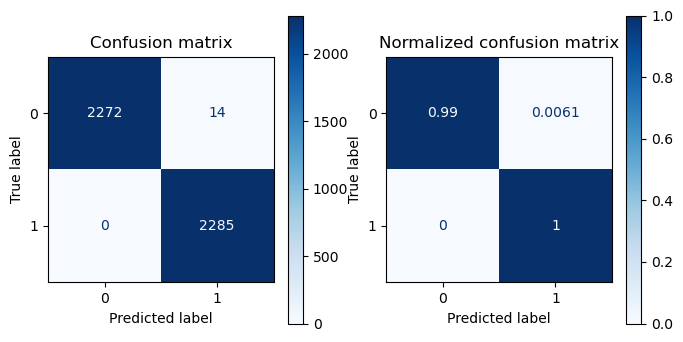

In [26]:
prediction = voting_classifier.predict(X_test)
get_evaluation(y_test, prediction, voting_classifier, X_test)

# DecisionTreeClassifier
오차 행렬
[[2286    0]
 [   0 2285]]
정확도: 1.0000, 정밀도: 1.0000, 재현율: 1.0000, F1:1.0000
###########################################################################


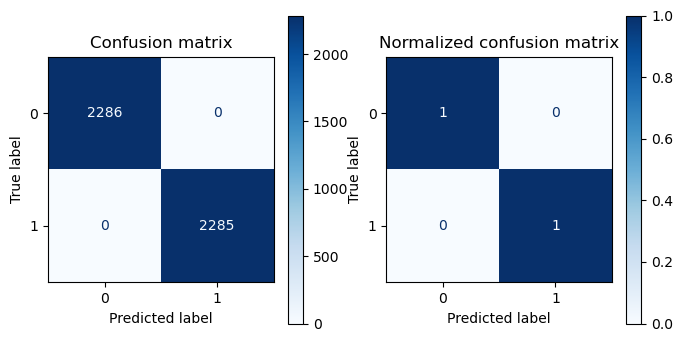

# SVC
오차 행렬
[[2271   15]
 [   0 2285]]
정확도: 0.9967, 정밀도: 0.9967, 재현율: 0.9967, F1:0.9967
###########################################################################


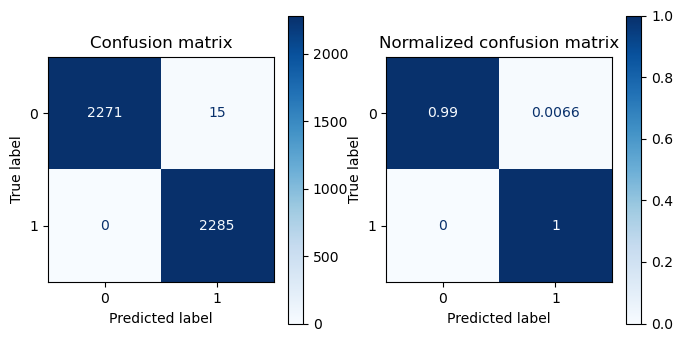

# KNeighborsClassifier
오차 행렬
[[2238   48]
 [   9 2276]]
정확도: 0.9875, 정밀도: 0.9877, 재현율: 0.9875, F1:0.9875
###########################################################################


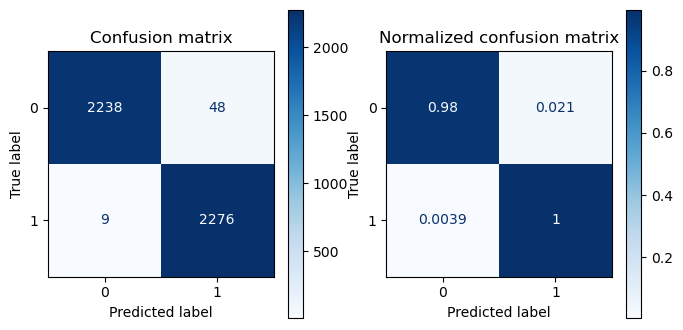

In [27]:
# 개별 모델의 학습/예측/평가.
classifiers = [grid_dt_classifier, grid_svc_classifier, grid_knn_classifier]
for classifier in classifiers:
    classifier.fit(X_train , y_train)
    prediction = classifier.predict(X_test)
    class_name= classifier.best_estimator_.__class__.__name__
    print(f'# {class_name}')
    get_evaluation(y_test, prediction, classifier, X_test)

### 배깅(Bagging) - 랜덤 포레스트(Random Forest)

#### RandomForestClassifier(n_estimators, min_samples_split, min_samples_leaf, n_jobs)

###### n_estimators  
- 생성할 tree의 개수를 작성한다.
- default: 50

###### min_samples_split
- 분할 할 수 있는 샘플 수이다.

##### min_samples_leaf
- 분할했을 때 leaf의 샘플 수이다.

In [28]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'max_depth': [4, 6],
    'min_samples_split': [6, 12],
    'min_samples_leaf': [4, 8]
}
start_time = time.time()

random_forest_classifier = RandomForestClassifier(n_estimators=50)

features, targets = balance_cardio_df.iloc[:, :-1], balance_cardio_df.prevalentHyp

X_train, X_test2, y_train, y_test = train_test_split(features, targets, stratify=targets, test_size=0.2)

grid_random_forest = GridSearchCV(random_forest_classifier, param_grid=param_grid, cv=5, n_jobs=3)

grid_random_forest.fit(X_train, y_train)

end_time = time.time()

# 소요된 시간 출력
elapsed_time = end_time - start_time
print(f"GridSearchCV 소요 시간: {elapsed_time} 초")

GridSearchCV 소요 시간: 3.4938182830810547 초


In [29]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix, ConfusionMatrixDisplay, f1_score, roc_auc_score
# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction)
#     재현율
    recall = recall_score(y_test , prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)
#     ROC-AUC
    roc_auc = roc_auc_score(y_test, prediction)

    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy , precision ,recall, f1, roc_auc))
    print("#" * 75)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

오차 행렬
[[2285    0]
 [   0 2286]]
정확도: 1.0000, 정밀도: 1.0000, 재현율: 1.0000, F1:1.0000, AUC:1.0000
###########################################################################


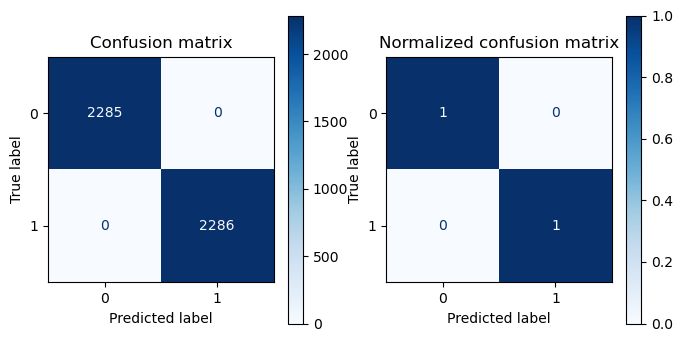

In [30]:
prediction = grid_random_forest.predict(X_test2)
get_evaluation(y_test, prediction, grid_random_forest, X_test2)

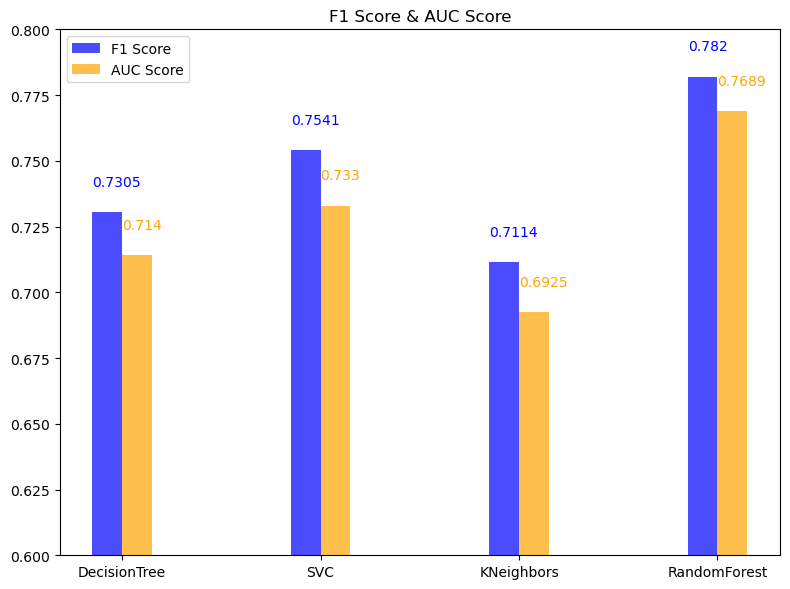

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# 모델 이름과 해당 F1 스코어, AUC 스코어를 리스트로 저장
model_names = ["DecisionTree", "SVC", "KNeighbors", "RandomForest"]
f1_scores = [0.7305, 0.7541, 0.7114, 0.7820]
auc_scores = [0.7140, 0.7330, 0.6925, 0.7689]

# 그래프 설정
fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.15
index = np.arange(len(model_names))

# F1 스코어 막대 그래프
bar1 = ax.bar(index, f1_scores, bar_width, label='F1 Score', color='blue', alpha=0.7)
for i, v in enumerate(f1_scores):
    ax.text(i - bar_width/2, v + 0.01, str(v), color='blue')

# AUC 스코어 막대 그래프
bar2 = ax.bar(index + bar_width, auc_scores, bar_width, label='AUC Score', color='orange', alpha=0.7)
for i, v in enumerate(auc_scores):
    ax.text(i + bar_width/2, v + 0.01, str(v), color='orange')

# x축 레이블 설정
ax.set_title('F1 Score & AUC Score')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(model_names)

# 범례 표시
ax.legend()

# y축 범위 설정
ax.set_ylim(0.6, 0.8)

plt.tight_layout()
plt.show()

### Coronary Heart Disease (관상동맥성 심장질환.)

#### 관상동맥성 심장질환 예측

- Sex: 남성 또는 여성("M" 또는 "F")
- Age: 환자의 연령;(연속적 - 기록된 연령이 정수로 절단되었음에도 불구하고 연령의 개념은 연속적) 행동
- Is_smoking: 환자가 현재 흡연자인지 여부("YES" 또는 "NO")
- Cigs Per Day: 하루에 평균적으로 피운 담배의 수. (담배의 수가 얼마든지 될 수 있기 때문에 연속적인 것으로 간주될 수 있습니다.) 
- BP Meds : 혈압약 복용 여부(명목)
- Prevalent Stroke: 환자가 이전에 뇌졸중을 앓았었는지 여부(명칭)
- Prevalent Hyp : 고혈압 여부 (명칭)
- Diabetes : 환자의 당뇨병 유무(명칭) 의학적(현재)
- Tot Chol : 총콜레스테롤 수치(연속)
- Sys BP: 수축기 혈압(연속)
- Dia BP : 이완기 혈압(Continuous)
- BMI: 체질량 지수(연속)
- Heart Rate: 심박수(Continuous - 의학 연구에서 심박수와 같은 변수는 실제로는 이산적이지만 많은 수의 가능한 값 때문에 연속적인 것으로 간주됩니다.)
- Glucose: 포도당 수준(연속) 예측변수(희망목표)
- TenYearCHD: 관상동맥성 심장 질환의 10년 위험 CHD (이진법: "1", "예", "0", "아니오"를 의미함) - DV

In [104]:
import pandas as pd

CHD_df = pd.read_csv('./datasets/CHD.csv')
display(CHD_df)
CHD_df.info()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [105]:
CHD_df.drop(columns = ['prevalentStroke'], axis=1)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


ValueError: could not convert string to float: 'F'

In [106]:
corr.sort_values(by="TenYearCHD", ascending=False).iloc[0].sort_values(ascending=False)

TenYearCHD      1.000000
age             0.224927
sysBP           0.212703
prevalentHyp    0.166544
diaBP           0.135979
sex             0.084647
BMI             0.066134
is_smoking      0.034143
Name: TenYearCHD, dtype: float64

#### 결측치 검사

In [41]:
print(CHD_df.isna().sum())

CHD_df.describe().T

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64


,count,mean,std,min,25%,50%,75%,max
id,3390.0,1694.500000,978.753033,0.00,847.25,1694.50,2541.75,3389.0
age,3390.0,49.542183,8.592878,32.00,42.00,49.00,56.00,70.0
education,3303.0,1.970936,1.019081,1.00,1.00,2.00,3.00,4.0
cigsPerDay,3368.0,9.069477,11.879078,0.00,0.00,0.00,20.00,70.0
BPMeds,3346.0,0.029886,0.170299,0.00,0.00,0.00,0.00,1.0
prevalentStroke,3390.0,0.006490,0.080309,0.00,0.00,0.00,0.00,1.0
prevalentHyp,3390.0,0.315339,0.464719,0.00,0.00,0.00,1.00,1.0
diabetes,3390.0,0.025664,0.158153,0.00,0.00,0.00,0.00,1.0
totChol,3352.0,237.074284,45.247430,107.00,206.00,234.00,264.00,696.0
sysBP,3390.0,132.601180,22.292030,83.50,117.00,128.50,144.00,295.0


In [42]:
# glucose 결측치 중앙값으로 대체
CHD_df['glucose']=CHD_df['glucose'].fillna(CHD_df['glucose'].median())

# education 는 연속적인 값이 아니므로 결측치를 최빈값으로 대체
CHD_df['education']=CHD_df['education'].fillna(CHD_df['education'].mode()[0])

# BPMeds 는 연속적인 값이 아니므로 결측치를 최빈값으로 대체
CHD_df['BPMeds']=CHD_df['BPMeds'].fillna(CHD_df['BPMeds'].mode()[0])

# totChol 결측치 중앙값으로 대체
CHD_df['totChol']=CHD_df['totChol'].fillna(CHD_df['totChol'].median())

# cigsPerDay 결측치 평균값으로 대체
CHD_df['cigsPerDay']=CHD_df['cigsPerDay'].fillna(CHD_df['cigsPerDay'].mean())

# BMI 결측치 중앙값으로 대체
CHD_df['BMI']=CHD_df['BMI'].fillna(CHD_df['BMI'].median())

# heartRate 결측치 중앙값으로 대체
CHD_df['heartRate']=CHD_df['heartRate'].fillna(CHD_df['heartRate'].median())


print(CHD_df.isna().sum())

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


#### 중복행 검사

In [43]:
CHD_df.duplicated().sum()

0

#### sex, is_smoking   컬럼 레이블 인코딩

In [108]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
CHD_df['sex']= encoder.fit_transform(CHD_df['sex'])
CHD_df['is_smoking']= encoder.fit_transform(CHD_df['is_smoking'])

CHD_df

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,0,0,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,0,0,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,1,1,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,1,0,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


Text(0.5, 1.0, 'Correlation')

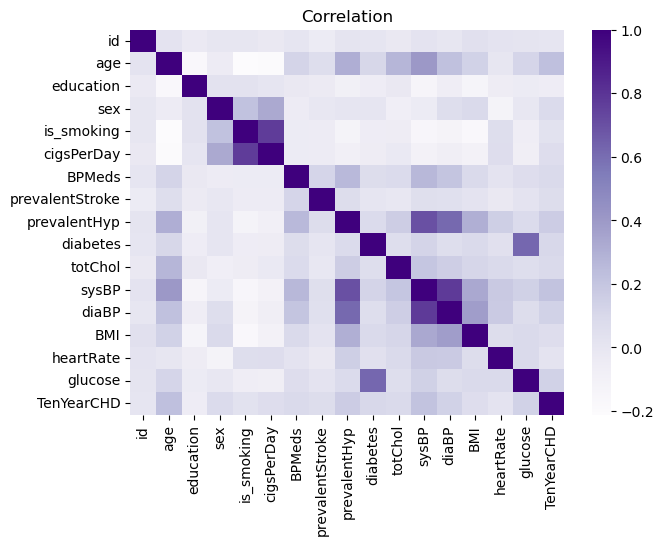

TenYearCHD         1.000000
age                0.224927
sysBP              0.212703
prevalentHyp       0.166544
glucose            0.138200
diaBP              0.135979
diabetes           0.103681
totChol            0.094306
BPMeds             0.088020
sex                0.084647
prevalentStroke    0.068627
BMI                0.066947
cigsPerDay         0.066778
is_smoking         0.034143
heartRate          0.020241
id                 0.009866
education         -0.052751
Name: TenYearCHD, dtype: float64

In [45]:
# id 컬럼 제거
CHD_df.drop(['id'],axis=1,inplace=True)


CHD_df = CHD_df[['age', 'sex', 'is_smoking', 'sysBP', 'diaBP', 'BMI', 'prevalentHyp','TenYearCHD']]
CHD_df

,age,sex,is_smoking,sysBP,diaBP,BMI,prevalentHyp,TenYearCHD
0,64,0,1,148.0,85.0,25.38,0,1
1,36,1,0,168.0,98.0,29.77,1,0
2,46,0,1,116.0,71.0,20.35,0,0
3,50,1,1,158.0,88.0,28.26,1,1
4,64,0,1,136.5,85.0,26.42,0,0
...,...,...,...,...,...,...,...,...
3385,60,0,0,123.5,79.0,29.28,0,0
3386,46,0,0,102.0,56.0,21.96,0,0
3387,44,1,1,164.0,119.0,28.92,1,1
3388,60,1,0,167.0,105.0,23.01,1,0


##### 상관 관계 분석

Text(0.5, 1.0, 'Correlation')

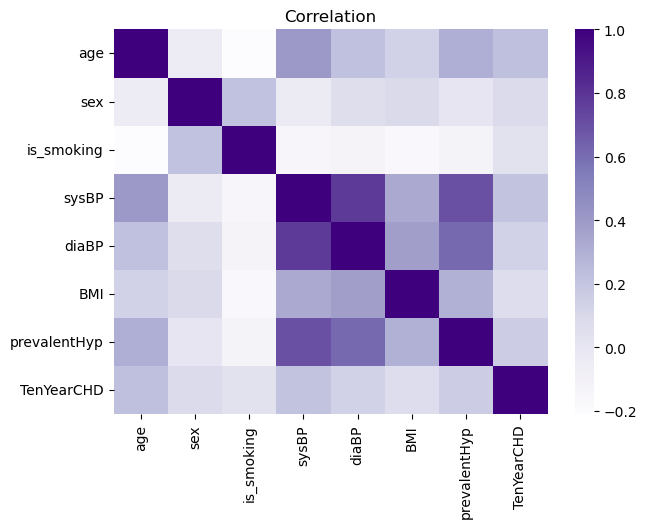

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt


corr = CHD_df.corr()
fig = plt.figure(figsize=(7, 5))
heatmap = sns.heatmap(corr, cmap="Purples")
heatmap.set_title("Correlation")

In [47]:
# 1. 상관관계 수치를 내림차순 정렬
# 2. 첫 번째 행 추출(가장 수치가 높은 데이터의 행)
# 3. 내림차순 정렬(상관 관계가 높은 순)

corr.sort_values(by="TenYearCHD", ascending=False).iloc[0].sort_values(ascending=False)

TenYearCHD      1.000000
age             0.224927
sysBP           0.212703
prevalentHyp    0.166544
diaBP           0.135979
sex             0.084647
BMI             0.066134
is_smoking      0.034143
Name: TenYearCHD, dtype: float64

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'is_smoking'}>],
       [<Axes: title={'center': 'sysBP'}>,
        <Axes: title={'center': 'diaBP'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'prevalentHyp'}>, <Axes: >, <Axes: >]],
      dtype=object)

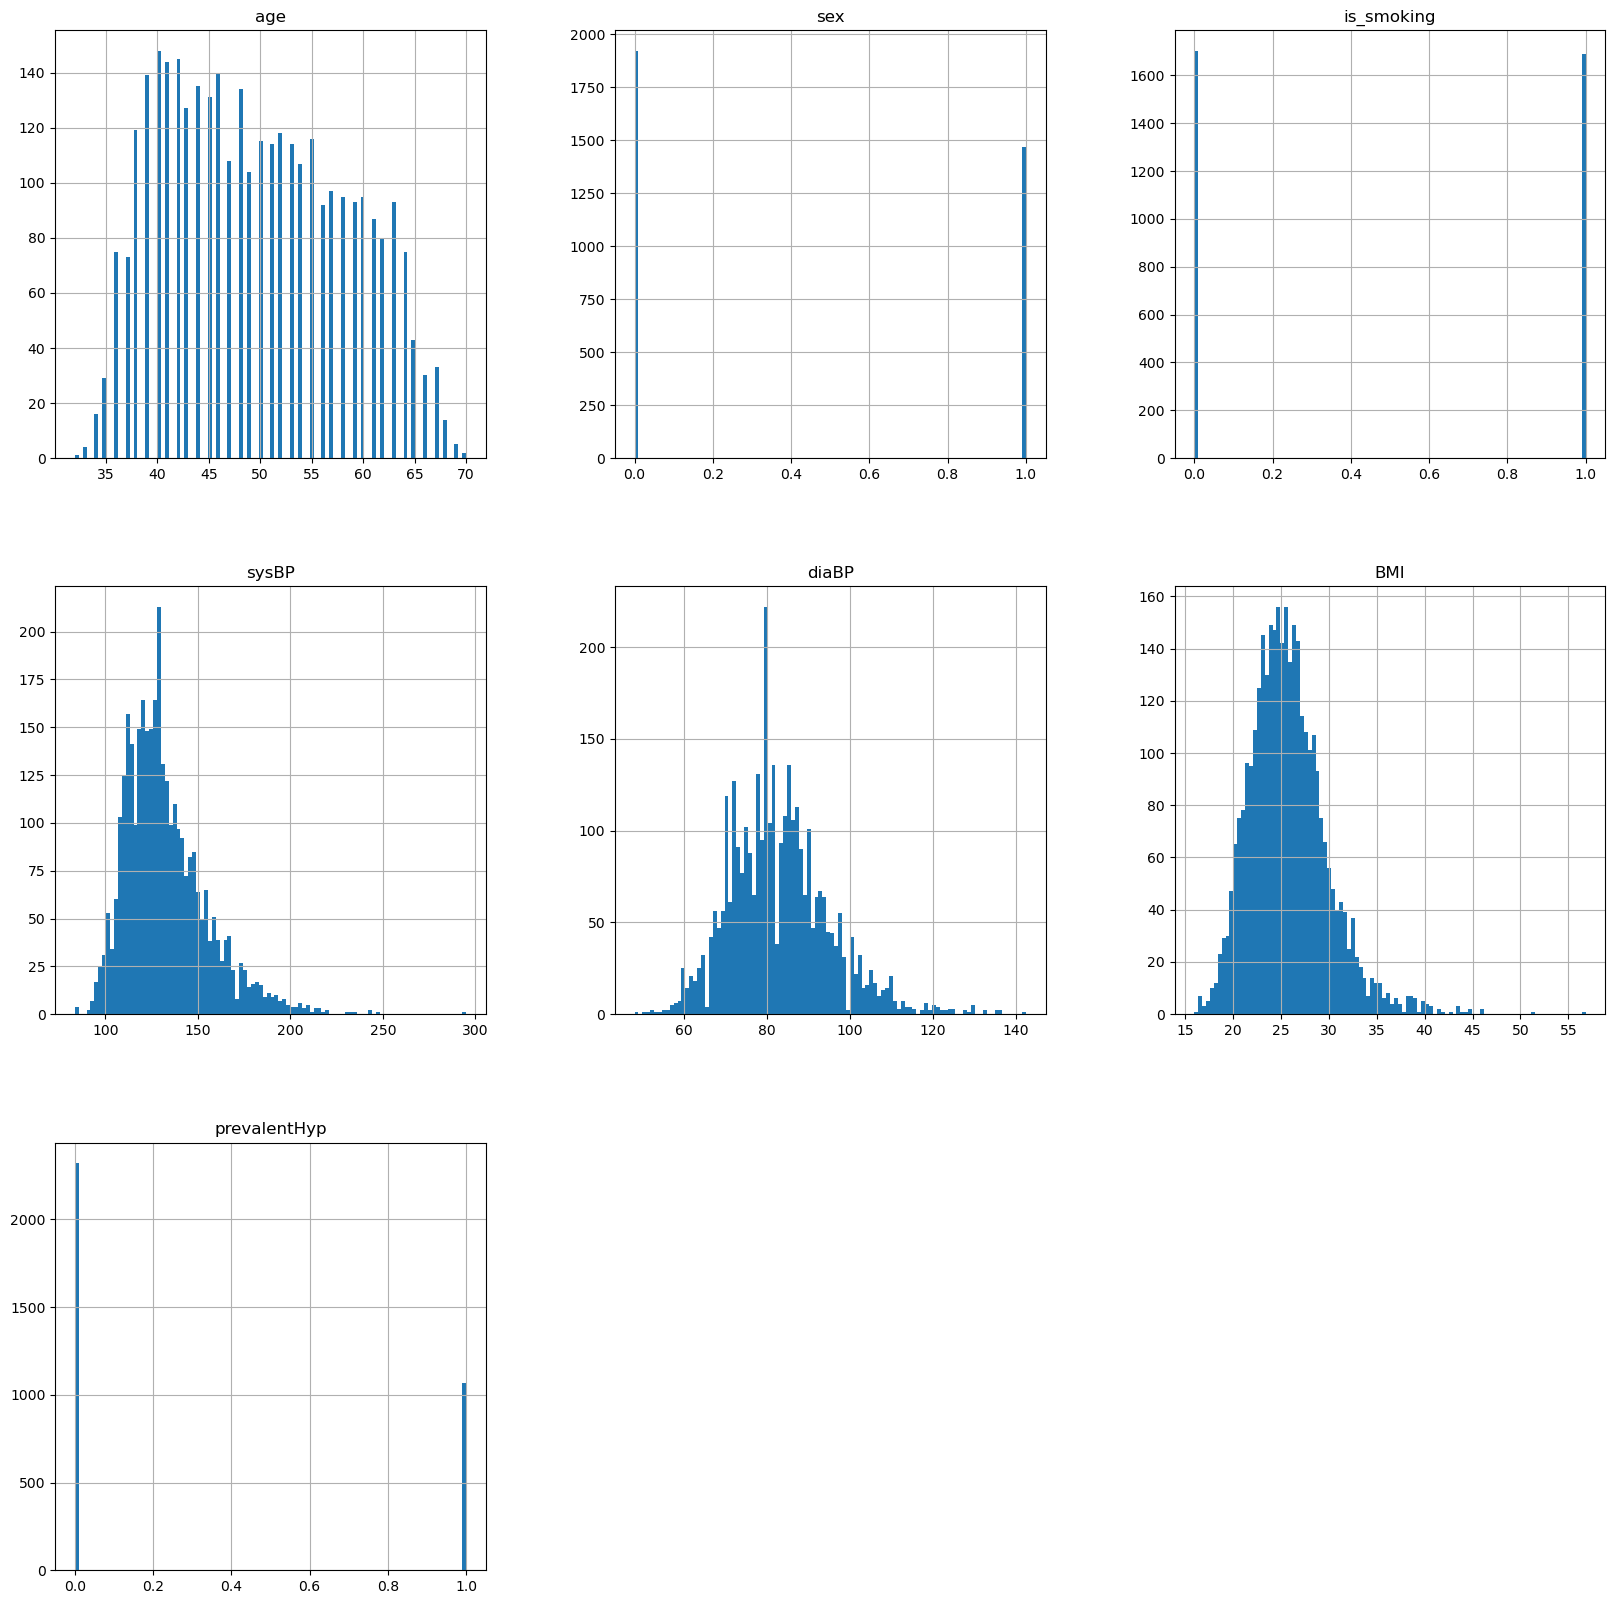

In [48]:
CHD_df.iloc[:, :-1].hist(figsize=(20, 20), bins=100)

##### 표준화를 통한 이상치 제거
- 표준화된 값이 평균을 기준으로 떨어져 있는 거리이므로, ±1.96 범위를 벗어난다면 이상치에 포함된다.  
- 상관 관계 비중이 높은 age, sysBP, diaBP, BMI 대해 이상치를 제거한다.

In [49]:
from sklearn.preprocessing import StandardScaler


scale = StandardScaler()
CHD_scaled = scale.fit_transform(CHD_df)
CHD_scaled_df = pd.DataFrame(CHD_scaled, columns=CHD_df.columns)


In [50]:
columns = ['age', 'sysBP', 'diaBP', 'BMI']

for column in columns:
    print(f'{column}: {CHD_scaled_df[~CHD_scaled_df[column].between(-1.96, 1.96)].shape[0]}건')

age: 55건
sysBP: 164건
diaBP: 164건
BMI: 145건


In [51]:
columns = ['age', 'sysBP', 'diaBP', 'BMI']
for column in columns:
    CHD_scaled_df.drop(CHD_scaled_df[~CHD_scaled_df[column].between(-1.96, 1.96)][column].index, axis=0, inplace=True)

for column in columns:
    print(f'{column}: {CHD_scaled_df[~CHD_scaled_df[column].between(-1.96, 1.96)].shape[0]}건')

age: 0건
sysBP: 0건
diaBP: 0건
BMI: 0건


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'is_smoking'}>],
       [<Axes: title={'center': 'sysBP'}>,
        <Axes: title={'center': 'diaBP'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'prevalentHyp'}>, <Axes: >, <Axes: >]],
      dtype=object)

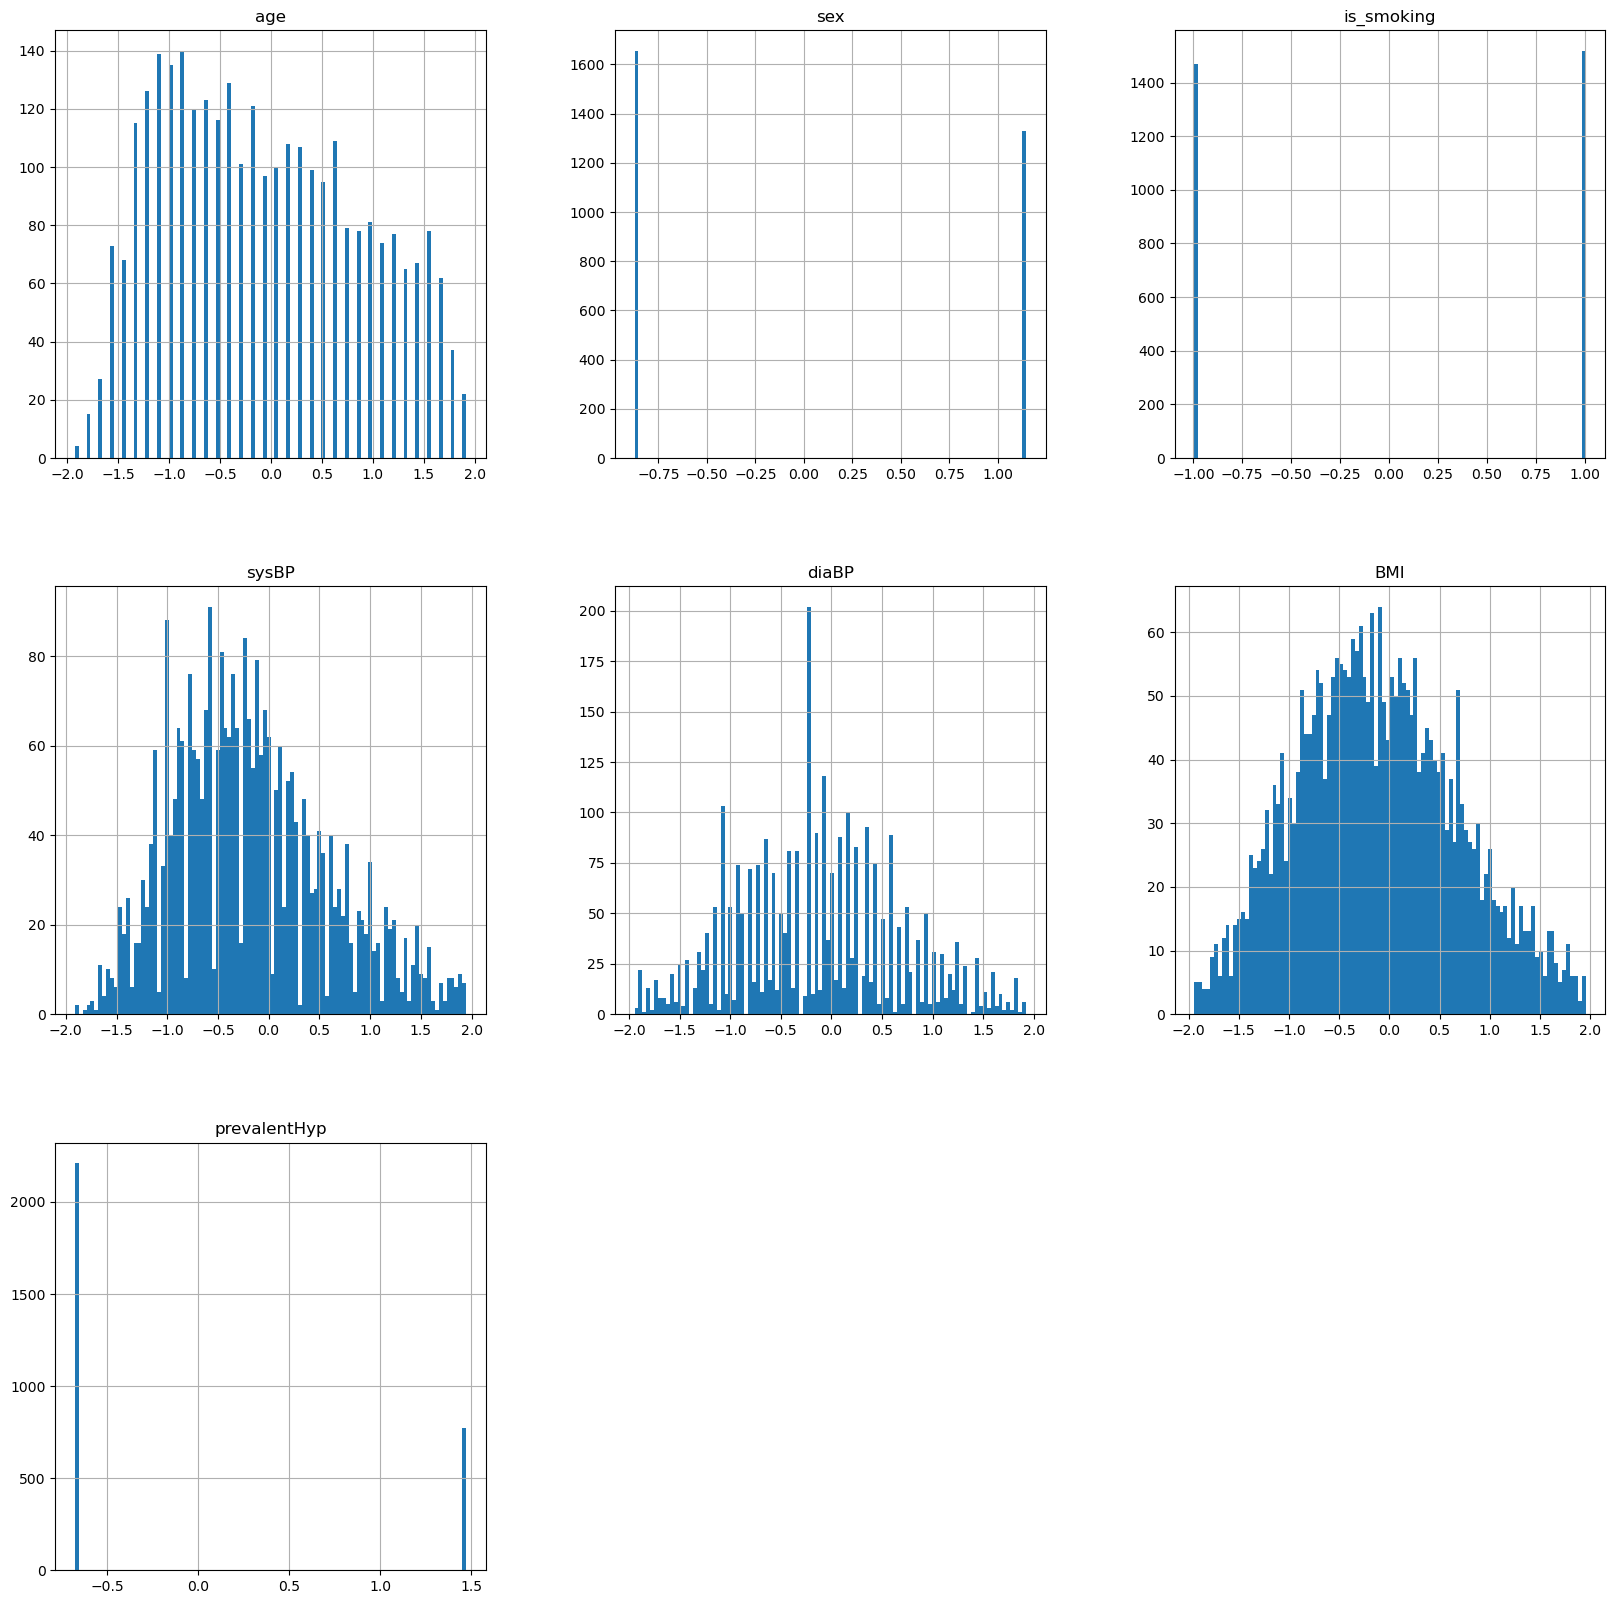

In [52]:
CHD_scaled_df.iloc[:, :-1].hist(figsize=(20, 20), bins=100)

In [53]:
CHD_df = CHD_df.iloc[CHD_scaled_df.index, :].reset_index(drop=True)
CHD_df

,age,sex,is_smoking,sysBP,diaBP,BMI,prevalentHyp,TenYearCHD
0,64,0,1,148.0,85.0,25.38,0,1
1,36,1,0,168.0,98.0,29.77,1,0
2,46,0,1,116.0,71.0,20.35,0,0
3,50,1,1,158.0,88.0,28.26,1,1
4,64,0,1,136.5,85.0,26.42,0,0
...,...,...,...,...,...,...,...,...
2982,43,1,0,129.0,90.0,25.29,1,0
2983,57,0,0,131.0,85.0,26.59,0,0
2984,60,0,0,123.5,79.0,29.28,0,0
2985,60,1,0,167.0,105.0,23.01,1,0


#### 정규화

In [54]:
from sklearn.preprocessing import MinMaxScaler

features, targets = CHD_df.iloc[:, :-1], CHD_df.TenYearCHD

CHD_scaled = MinMaxScaler().fit_transform(features)
CHD_scaled_df = pd.DataFrame(CHD_scaled, columns=features.columns)
CHD_scaled_df

,age,sex,is_smoking,sysBP,diaBP,BMI,prevalentHyp
0,0.939394,0.0,1.0,0.674419,0.548387,0.472829,0.0
1,0.090909,1.0,0.0,0.906977,0.827957,0.747033,1.0
2,0.393939,0.0,1.0,0.302326,0.247312,0.158651,0.0
3,0.515152,1.0,1.0,0.790698,0.612903,0.652717,1.0
4,0.939394,0.0,1.0,0.540698,0.548387,0.537789,0.0
...,...,...,...,...,...,...,...
2982,0.303030,1.0,0.0,0.453488,0.655914,0.467208,1.0
2983,0.727273,0.0,0.0,0.476744,0.548387,0.548407,0.0
2984,0.818182,0.0,0.0,0.389535,0.419355,0.716427,0.0
2985,0.818182,1.0,0.0,0.895349,0.978495,0.324797,1.0


In [55]:
CHD_scaled_df['TenYearCHD'] = CHD_df['TenYearCHD']
CHD_scaled_df

,age,sex,is_smoking,sysBP,diaBP,BMI,prevalentHyp,TenYearCHD
0,0.939394,0.0,1.0,0.674419,0.548387,0.472829,0.0,1
1,0.090909,1.0,0.0,0.906977,0.827957,0.747033,1.0,0
2,0.393939,0.0,1.0,0.302326,0.247312,0.158651,0.0,0
3,0.515152,1.0,1.0,0.790698,0.612903,0.652717,1.0,1
4,0.939394,0.0,1.0,0.540698,0.548387,0.537789,0.0,0
...,...,...,...,...,...,...,...,...
2982,0.303030,1.0,0.0,0.453488,0.655914,0.467208,1.0,0
2983,0.727273,0.0,0.0,0.476744,0.548387,0.548407,0.0,0
2984,0.818182,0.0,0.0,0.389535,0.419355,0.716427,0.0,0
2985,0.818182,1.0,0.0,0.895349,0.978495,0.324797,1.0,0


#### 타겟 분포를 최소 타겟수로 맞춰주기

In [56]:
CHD_scaled_df.TenYearCHD.value_counts()

TenYearCHD
0    2596
1     391
Name: count, dtype: int64

In [57]:
TenYearCHD_no = CHD_scaled_df[CHD_scaled_df.TenYearCHD == 0].sample(391)
TenYearCHD_yes = CHD_scaled_df[CHD_scaled_df.TenYearCHD == 1]

balance_CHD_df = pd.concat([TenYearCHD_no, TenYearCHD_yes])

balance_CHD_df.TenYearCHD.value_counts()

TenYearCHD
0    391
1    391
Name: count, dtype: int64

In [58]:
balance_CHD_df.reset_index(drop=True, inplace=True)
balance_CHD_df

,age,sex,is_smoking,sysBP,diaBP,BMI,prevalentHyp,TenYearCHD
0,0.848485,1.0,1.0,0.779070,0.849462,0.682698,1.0,0
1,0.727273,0.0,0.0,0.441860,0.526882,0.492192,0.0,0
2,0.757576,0.0,0.0,0.622093,0.548387,0.241724,1.0,0
3,0.393939,0.0,0.0,0.325581,0.419355,0.549656,0.0,0
4,0.303030,0.0,1.0,0.104651,0.053763,0.272330,0.0,0
...,...,...,...,...,...,...,...,...
777,0.242424,1.0,1.0,0.255814,0.086022,0.461587,0.0,1
778,0.666667,0.0,0.0,0.959302,0.881720,0.903186,1.0,1
779,0.606061,1.0,0.0,0.982558,0.935484,0.750156,1.0,1
780,0.393939,0.0,0.0,0.453488,0.548387,0.599001,0.0,1


### 보팅(Voting)

##### VotingClassifier(n_estimators, voting)

###### n_estimators  
- 추가할 모델 객체를 list형태로 전달한다.
- 예시) [('DTC',grid_dt_classifier),('SVC',grid_sv_classifier), ('KNN', grid_knn_classifier)]

###### voting
- soft, hard 중 선택한다.
- default: 'hard'

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
import time

# 하이퍼 파라미터 튜닝
dt_params = {'max_depth': [5, 6, 7], 'min_samples_split': [7, 8, 9]}
svm_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
             'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
             'kernel': ['linear', 'rbf']}
knn_params = {'n_neighbors': [3, 5, 7, 9, 11]}

start_time = time.time()

grid_dt_classifier = GridSearchCV(DecisionTreeClassifier(), param_grid=dt_params, cv=3, refit=True, return_train_score=True, n_jobs=3, error_score='raise')
# 소프트 보팅에서는 각 결정 클래스별 확률이 필요하기 때문에, SVC에 probability를 True로 하여
# predict_proba()를 사용할 수 있도록 해준다
grid_svc_classifier = GridSearchCV(SVC(probability=True), param_grid=svm_params, cv=3, refit=True, return_train_score=True, n_jobs=3, error_score='raise')
# KNN에서 Flag오류 발생
# Series 타입의 훈련 데이터에는 flags 속성이 없기 때문에, numpy로 변경한 뒤 훈련시켜야 한다.
grid_knn_classifier = GridSearchCV(KNeighborsClassifier(), param_grid=knn_params, cv=3, refit=True, return_train_score=True, n_jobs=3, error_score='raise')


# hard voting
# 오차 행렬
# [[48 31]
# [31 47]]
# 정확도: 0.6051, 정밀도: 0.6026, 재현율: 0.6026, F1:0.6026, AUC:0.6051

voting_classifier = VotingClassifier(estimators=[('DTC', grid_dt_classifier)
                                                 , ('SVC', grid_svc_classifier)
                                                 , ('KNN', grid_knn_classifier)]
                                     , voting='hard')


# soft voting
# 오차 행렬
# [[54 25]
# [23 55]]
# 정확도: 0.6943, 정밀도: 0.6875, 재현율: 0.7051, F1:0.6962, AUC:0.6943

# voting_classifier = VotingClassifier(estimators=[('DTC', grid_dt_classifier)
#                                                  , ('SVC', grid_svc_classifier)
#                                                  , ('KNN', grid_knn_classifier)]
#                                      , voting='soft')

# 데이터 세트 분리
features, targets = balance_CHD_df.iloc[:, :-1], balance_CHD_df.TenYearCHD

X_train, X_test, y_train, y_test = train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=20)

# VotingClassifier 학습/예측/평가
voting_classifier.fit(X_train, y_train)

end_time = time.time()

# 소요된 시간 출력
elapsed_time = end_time - start_time
print(f"GridSearchCV 소요 시간: {elapsed_time} 초")

GridSearchCV 소요 시간: 6.6217875480651855 초


In [60]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix, ConfusionMatrixDisplay, f1_score, roc_auc_score
# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction)
#     재현율
    recall = recall_score(y_test , prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)
#     ROC-AUC
    roc_auc = roc_auc_score(y_test, prediction)

    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy , precision ,recall, f1, roc_auc))
    print("#" * 75)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

오차 행렬
[[59 19]
 [31 48]]
정확도: 0.6815, 정밀도: 0.7164, 재현율: 0.6076, F1:0.6575, AUC:0.6820
###########################################################################


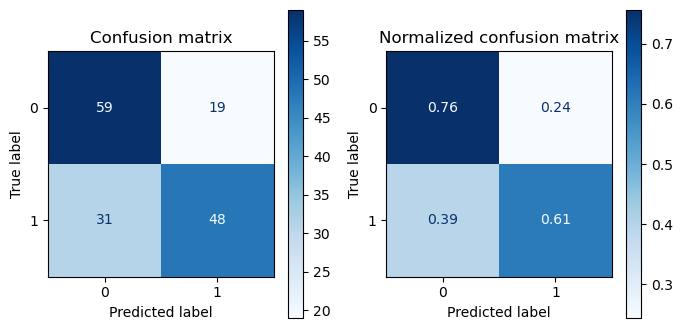

In [61]:
prediction = voting_classifier.predict(X_test)
get_evaluation(y_test, prediction, voting_classifier, X_test)

# DecisionTreeClassifier
오차 행렬
[[49 29]
 [37 42]]
정확도: 0.5796, 정밀도: 0.5915, 재현율: 0.5316, F1:0.5600, AUC:0.5799
###########################################################################


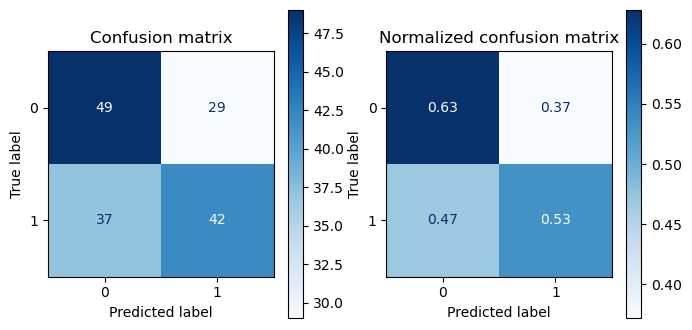

# SVC
오차 행렬
[[58 20]
 [27 52]]
정확도: 0.7006, 정밀도: 0.7222, 재현율: 0.6582, F1:0.6887, AUC:0.7009
###########################################################################


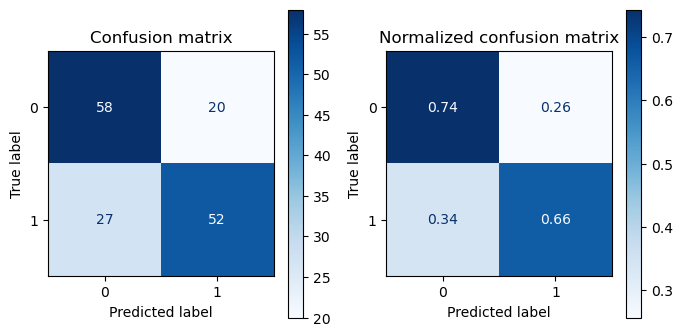

# KNeighborsClassifier
오차 행렬
[[55 23]
 [31 48]]
정확도: 0.6561, 정밀도: 0.6761, 재현율: 0.6076, F1:0.6400, AUC:0.6564
###########################################################################


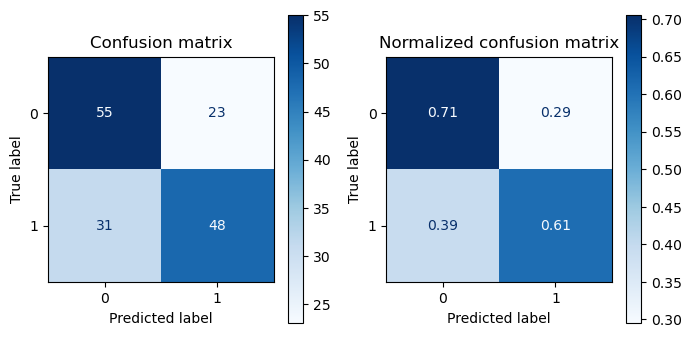

In [62]:
# 개별 모델의 학습/예측/평가.
classifiers = [grid_dt_classifier, grid_svc_classifier, grid_knn_classifier]
for classifier in classifiers:
    classifier.fit(X_train , y_train)
    prediction = classifier.predict(X_test)
    class_name= classifier.best_estimator_.__class__.__name__
    print(f'# {class_name}')
    get_evaluation(y_test, prediction, classifier, X_test)

In [63]:

# prevalentHyp_1 = balance_cardio_df[balance_cardio_df['prevalentHyp'] == 1]
# prevalentHyp_1 = prevalentHyp_1.sample(157)
# prevalentHyp_1
# X_test
# X_test2 = X_test2.sample(157)
# X_test2

In [64]:
# prediction = voting_classifier.predict(prevalentHyp_1)
# get_evaluation(y_test, prediction, voting_classifier, prevalentHyp_1)

### 배깅(Bagging) - 랜덤 포레스트(Random Forest)

#### RandomForestClassifier(n_estimators, min_samples_split, min_samples_leaf, n_jobs)

###### n_estimators  
- 생성할 tree의 개수를 작성한다.
- default: 50

###### min_samples_split
- 분할 할 수 있는 샘플 수이다.

##### min_samples_leaf
- 분할했을 때 leaf의 샘플 수이다.

In [98]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
import time
param_grid = {
    'max_depth': [4, 6, 8, 10, 12],
    'min_samples_split': [6, 12, 18, 24],
    'min_samples_leaf': [4, 8, 12, 16]
}

random_forest_classifier = RandomForestClassifier(n_estimators=100)

features, targets = balance_CHD_df.iloc[:, :-1], balance_CHD_df.TenYearCHD

start_time = time.time()

X_train, X_test, y_train, y_test = train_test_split(features, targets, stratify=targets, test_size=0.3, random_state=20)

grid_random_forest = GridSearchCV(random_forest_classifier, param_grid=param_grid, cv=10, n_jobs=3)

grid_random_forest.fit(X_train, y_train)

end_time = time.time()

# 소요된 시간 출력
elapsed_time = end_time - start_time
print(f"GridSearchCV 소요 시간: {elapsed_time} 초")

GridSearchCV 소요 시간: 40.94084715843201 초


In [66]:
# DataFrame으로 변환
scores_df = pd.DataFrame(grid_random_forest.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 
           'split0_test_score', 'split1_test_score', 'split2_test_score']].sort_values(by='rank_test_score')

# prevalentHyp_1 = balance_cardio_df[balance_cardio_df['prevalentHyp'] == 1]
# prevalentHyp_1 = prevalentHyp_1.sample(235)
# prevalentHyp_1

# prevalentHyp_2 = balance_cardio_df.sample(235)
# prevalentHyp_2

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
4,"{'max_depth': 4, 'min_samples_leaf': 8, 'min_s...",0.634411,1,0.745455,0.545455,0.654545
29,"{'max_depth': 6, 'min_samples_leaf': 16, 'min_...",0.634175,2,0.763636,0.600000,0.672727
71,"{'max_depth': 12, 'min_samples_leaf': 8, 'min_...",0.632626,3,0.727273,0.545455,0.654545
74,"{'max_depth': 12, 'min_samples_leaf': 12, 'min...",0.632492,4,0.781818,0.600000,0.690909
52,"{'max_depth': 10, 'min_samples_leaf': 8, 'min_...",0.630808,5,0.654545,0.581818,0.690909
...,...,...,...,...,...,...
65,"{'max_depth': 12, 'min_samples_leaf': 4, 'min_...",0.607003,76,0.600000,0.545455,0.636364
70,"{'max_depth': 12, 'min_samples_leaf': 8, 'min_...",0.606936,77,0.654545,0.581818,0.654545
51,"{'max_depth': 10, 'min_samples_leaf': 4, 'min_...",0.605152,78,0.672727,0.527273,0.636364
24,"{'max_depth': 6, 'min_samples_leaf': 12, 'min_...",0.605051,79,0.690909,0.527273,0.672727


오차 행렬
[[84 33]
 [40 78]]
정확도: 0.6894, 정밀도: 0.7027, 재현율: 0.6610, F1:0.6812, AUC:0.6895
###########################################################################


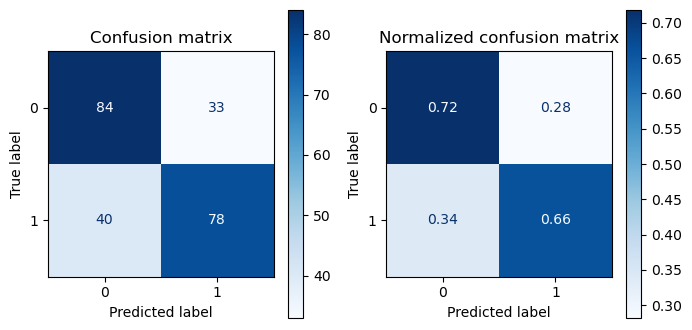

In [99]:

prediction = grid_random_forest.predict(X_test)
get_evaluation(y_test, prediction, grid_random_forest, X_test)

In [93]:
prediction_proba = grid_random_forest.predict_proba(X_test)
def get_evaluation_by_thresholds(y_test, prediction_proba_class1, thresholds):
    
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold).fit(prediction_proba_class1) 
        custom_prediction = binarizer.transform(prediction_proba_class1)
        print('임곗값:', threshold)
        get_evaluation(y_test, custom_prediction)

In [69]:
# prediction_proba
# prediction_proba_class1

In [100]:
from sklearn.preprocessing import Binarizer
from sklearn.metrics import precision_recall_curve

prediction_prob = grid_random_forest.predict_proba(X_test)
prediction_prob_class1 = prediction_prob[:, 1].reshape(-1, 1)

precision, recall, thresholds = precision_recall_curve(y_test, prediction_prob_class1)

get_evaluation_by_thresholds(y_test, prediction_prob_class1, thresholds)

임곗값: 0.07730723179633911
오차 행렬
[[  1 116]
 [  0 118]]
정확도: 0.5064, 정밀도: 0.5043, 재현율: 1.0000, F1:0.6705, AUC:0.5043
###########################################################################
임곗값: 0.09507083033568454
오차 행렬
[[  2 115]
 [  0 118]]
정확도: 0.5106, 정밀도: 0.5064, 재현율: 1.0000, F1:0.6724, AUC:0.5085
###########################################################################
임곗값: 0.10352987912003295
오차 행렬
[[  3 114]
 [  0 118]]
정확도: 0.5149, 정밀도: 0.5086, 재현율: 1.0000, F1:0.6743, AUC:0.5128
###########################################################################
임곗값: 0.11116666710418967
오차 행렬
[[  4 113]
 [  0 118]]
정확도: 0.5191, 정밀도: 0.5108, 재현율: 1.0000, F1:0.6762, AUC:0.5171
###########################################################################
임곗값: 0.1195386875258221
오차 행렬
[[  4 113]
 [  1 117]]
정확도: 0.5149, 정밀도: 0.5087, 재현율: 0.9915, F1:0.6724, AUC:0.5129
###########################################################################
임곗값: 0.11962572173100484
오차 행렬
[[  5 112]
 [  

오차 행렬
[[ 42  75]
 [ 12 106]]
정확도: 0.6298, 정밀도: 0.5856, 재현율: 0.8983, F1:0.7090, AUC:0.6286
###########################################################################
임곗값: 0.3682462331231438
오차 행렬
[[ 43  74]
 [ 12 106]]
정확도: 0.6340, 정밀도: 0.5889, 재현율: 0.8983, F1:0.7114, AUC:0.6329
###########################################################################
임곗값: 0.36828947349680374
오차 행렬
[[ 44  73]
 [ 12 106]]
정확도: 0.6383, 정밀도: 0.5922, 재현율: 0.8983, F1:0.7138, AUC:0.6372
###########################################################################
임곗값: 0.3712424482997626
오차 행렬
[[ 44  73]
 [ 13 105]]
정확도: 0.6340, 정밀도: 0.5899, 재현율: 0.8898, F1:0.7095, AUC:0.6329
###########################################################################
임곗값: 0.37170576424517426
오차 행렬
[[ 45  72]
 [ 13 105]]
정확도: 0.6383, 정밀도: 0.5932, 재현율: 0.8898, F1:0.7119, AUC:0.6372
###########################################################################
임곗값: 0.3727187527388589
오차 행렬
[[ 45  72]
 [ 14 104]]
정확도: 0.6340, 정밀도: 0

오차 행렬
[[74 43]
 [34 84]]
정확도: 0.6723, 정밀도: 0.6614, 재현율: 0.7119, F1:0.6857, AUC:0.6722
###########################################################################
임곗값: 0.46916861127505166
오차 행렬
[[75 42]
 [34 84]]
정확도: 0.6766, 정밀도: 0.6667, 재현율: 0.7119, F1:0.6885, AUC:0.6764
###########################################################################
임곗값: 0.47025071613501784
오차 행렬
[[76 41]
 [34 84]]
정확도: 0.6809, 정밀도: 0.6720, 재현율: 0.7119, F1:0.6914, AUC:0.6807
###########################################################################
임곗값: 0.47052874188560667
오차 행렬
[[77 40]
 [34 84]]
정확도: 0.6851, 정밀도: 0.6774, 재현율: 0.7119, F1:0.6942, AUC:0.6850
###########################################################################
임곗값: 0.47866103003712746
오차 행렬
[[78 39]
 [34 84]]
정확도: 0.6894, 정밀도: 0.6829, 재현율: 0.7119, F1:0.6971, AUC:0.6893
###########################################################################
임곗값: 0.4805989189708886
오차 행렬
[[78 39]
 [35 83]]
정확도: 0.6851, 정밀도: 0.6803, 재현율: 0.7034, F1

오차 행렬
[[100  17]
 [ 57  61]]
정확도: 0.6851, 정밀도: 0.7821, 재현율: 0.5169, F1:0.6224, AUC:0.6858
###########################################################################
임곗값: 0.5657712741120048
오차 행렬
[[101  16]
 [ 57  61]]
정확도: 0.6894, 정밀도: 0.7922, 재현율: 0.5169, F1:0.6256, AUC:0.6901
###########################################################################
임곗값: 0.5666012031681316
오차 행렬
[[101  16]
 [ 58  60]]
정확도: 0.6851, 정밀도: 0.7895, 재현율: 0.5085, F1:0.6186, AUC:0.6859
###########################################################################
임곗값: 0.5675734048883982
오차 행렬
[[101  16]
 [ 59  59]]
정확도: 0.6809, 정밀도: 0.7867, 재현율: 0.5000, F1:0.6114, AUC:0.6816
###########################################################################
임곗값: 0.5682159680115703
오차 행렬
[[101  16]
 [ 60  58]]
정확도: 0.6766, 정밀도: 0.7838, 재현율: 0.4915, F1:0.6042, AUC:0.6774
###########################################################################
임곗값: 0.5683618568461484
오차 행렬
[[101  16]
 [ 61  57]]
정확도: 0.6723, 정밀도: 0.7

오차 행렬
[[113   4]
 [ 96  22]]
정확도: 0.5745, 정밀도: 0.8462, 재현율: 0.1864, F1:0.3056, AUC:0.5761
###########################################################################
임곗값: 0.6684120903046356
오차 행렬
[[113   4]
 [ 97  21]]
정확도: 0.5702, 정밀도: 0.8400, 재현율: 0.1780, F1:0.2937, AUC:0.5719
###########################################################################
임곗값: 0.6688569104091591
오차 행렬
[[113   4]
 [ 98  20]]
정확도: 0.5660, 정밀도: 0.8333, 재현율: 0.1695, F1:0.2817, AUC:0.5677
###########################################################################
임곗값: 0.6715403411752454
오차 행렬
[[113   4]
 [ 99  19]]
정확도: 0.5617, 정밀도: 0.8261, 재현율: 0.1610, F1:0.2695, AUC:0.5634
###########################################################################
임곗값: 0.6739423585486738
오차 행렬
[[113   4]
 [100  18]]
정확도: 0.5574, 정밀도: 0.8182, 재현율: 0.1525, F1:0.2571, AUC:0.5592
###########################################################################
임곗값: 0.6750026990330776
오차 행렬
[[113   4]
 [101  17]]
정확도: 0.5532, 정밀도: 0.8

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


오차 행렬
[[78 39]
 [35 83]]
정확도: 0.6851, 정밀도: 0.6803, 재현율: 0.7034, F1:0.6917, AUC:0.6850
###########################################################################


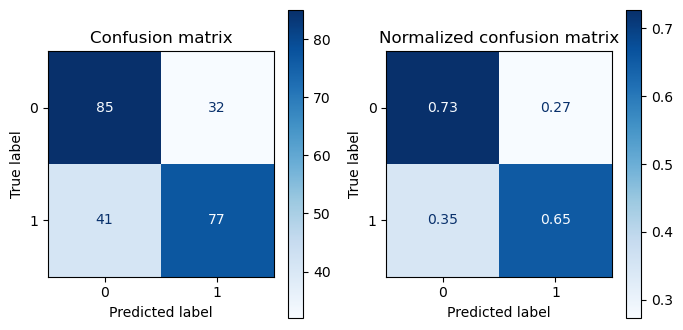

In [71]:
prediction = Binarizer(threshold=0.4770450327409167).fit_transform(prediction_prob_class1)
get_evaluation(y_test, prediction, grid_random_forest, X_test)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


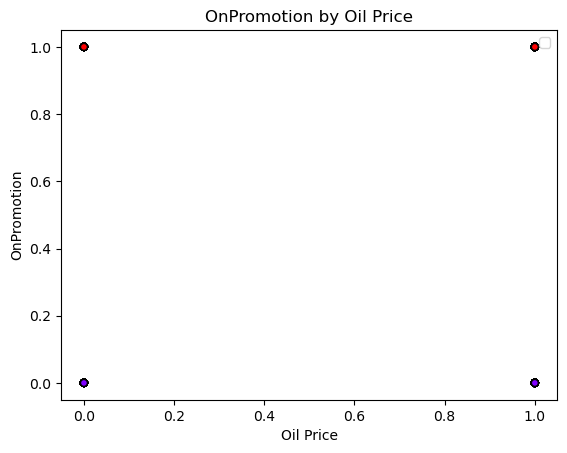

In [72]:

import matplotlib.pyplot as plt

plt.title("OnPromotion by Oil Price")
plt.xlabel('Oil Price')
plt.ylabel('OnPromotion')

# 범례 추가
plt.legend()
plt.scatter(balance_CHD_df.iloc[:,2], balance_CHD_df.TenYearCHD, marker='o', c=balance_CHD_df.TenYearCHD, s=25, cmap="rainbow", edgecolors='k')

In [73]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler

# features, targets = balance_CHD_df.iloc[:, :-1], balance_CHD_df.TenYearCHD

# scaler = StandardScaler()

# # 표준화
# features_scaled = scaler.fit_transform(features)

# # stratify: 데이터를 나눌 때 타겟 데이터 분호 비율에 맞춰서 나눠준다.
# X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, stratify=targets, random_state=256)

# # 결정 트리 분류
# decision_tree_classifier = DecisionTreeClassifier()
# parameters = {'max_depth': [5, 6, 7], 'min_samples_split': [7, 8, 9]}

# # GridSearchCV 생성자는 훈련이 아니라 하이퍼 파라미터 튜닝이다.
# grid_decision_tree = GridSearchCV(decision_tree_classifier, param_grid=parameters, cv=10, refit=True, return_train_score=True)

# # 훈련 시 교차 검증으로 진행한다.
# grid_decision_tree.fit(X_train, y_train)

# print(f'GridSearchCV 최적 파라미터: {grid_decision_tree.best_params_}')
# print(f'GridSearchCV 최고 정확도: {grid_decision_tree.best_score_}')

# prediction = grid_decision_tree.predict(X_test)
# print(f'테스트 데이터 세트 정확도: {accuracy_score(y_test, prediction)}')

# scores_df = pd.DataFrame(grid_decision_tree.cv_results_)
# scores_df[['params', 'mean_test_score', 'rank_test_score', 
#            'split0_test_score', 'split1_test_score', 'split2_test_score']]

# display(scores_df)

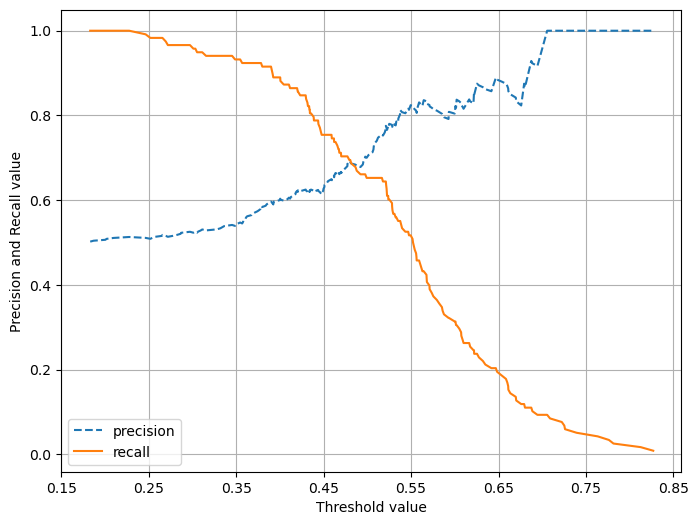

In [74]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
def precision_recall_curve_plot(y_test , prediction_proba_class1):

    precisions, recalls, thresholds = precision_recall_curve(y_test, prediction_proba_class1)
    
    # X축: threshold
    # Y축: 정밀도, 재현율 
    # 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # X축(threshold)의 Scale을 0 ~ 1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, grid_random_forest.predict_proba(X_test)[:, 1] )

In [75]:
from sklearn.metrics import roc_curve

# 타겟 데이터가 1일 때의 예측 확률 추출
prediction_proba_class1 = grid_random_forest.predict_proba(X_test)[:, 1].reshape(-1, 1)
fprs, tprs, thresholds = roc_curve(y_test, prediction_proba_class1)

threshold_index = np.arange(1, thresholds.shape[0])
print(thresholds.shape[0])

print('임계값의 index:', threshold_index)
print('임계값: ', np.round(thresholds[threshold_index], 2))

# 추출된 임계값에 따른 FPR, TPR 값
print('임계값 별 FPR: ', np.round(fprs[threshold_index], 2))
print('임계값 별 TPR: ', np.round(tprs[threshold_index], 2))

96
임계값의 index: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95]
임계값:  [0.83 0.71 0.69 0.69 0.68 0.68 0.68 0.65 0.64 0.63 0.62 0.62 0.62 0.62
 0.61 0.6  0.6  0.6  0.6  0.59 0.59 0.56 0.56 0.56 0.56 0.55 0.55 0.55
 0.54 0.54 0.54 0.53 0.53 0.53 0.53 0.52 0.52 0.52 0.52 0.52 0.52 0.52
 0.5  0.5  0.49 0.48 0.48 0.48 0.47 0.47 0.47 0.47 0.47 0.46 0.46 0.46
 0.46 0.46 0.45 0.44 0.44 0.44 0.43 0.43 0.43 0.43 0.43 0.43 0.42 0.42
 0.42 0.42 0.41 0.41 0.4  0.4  0.39 0.39 0.38 0.38 0.36 0.35 0.35 0.35
 0.32 0.31 0.31 0.3  0.3  0.3  0.27 0.27 0.25 0.23 0.18]
임계값 별 FPR:  [0.   0.   0.01 0.01 0.02 0.02 0.03 0.03 0.03 0.03 0.04 0.04 0.05 0.05
 0.06 0.06 0.07 0.07 0.08 0.08 0.09 0.09 0.09 0.09 0.11 0.11 0.12 0.12
 0.13 0.13 0.15 0.15 0.16 0.16 0.17 0.17 0.18 0.18 0

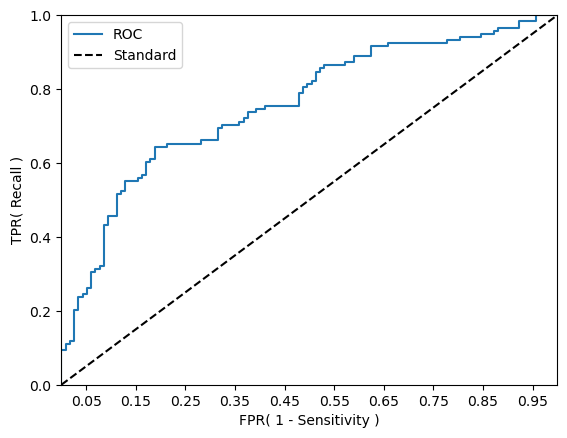

In [76]:
def roc_curve_plot(y_test , prediction_proba_class1):
#     임계값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test ,prediction_proba_class1)

#     ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
#     가운데 대각선 직선을 그림. 
#     TPR과 FPR이 동일한 비율로 떨어진다는 것은 모델이 양성과 음성을 구별하지 못한다는 것을 의미한다.
#     다른 분류기를 판단하기 위한 기준선으로 사용되며, 
#     대각선에 가까울 수록 예측에 사용하기 힘든 모델이라는 뜻이다.
    plt.plot([0, 1], [0, 1], 'k--', label='Standard')
    
    # X축(FPR)의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, grid_random_forest.predict_proba(X_test)[:, 1] )

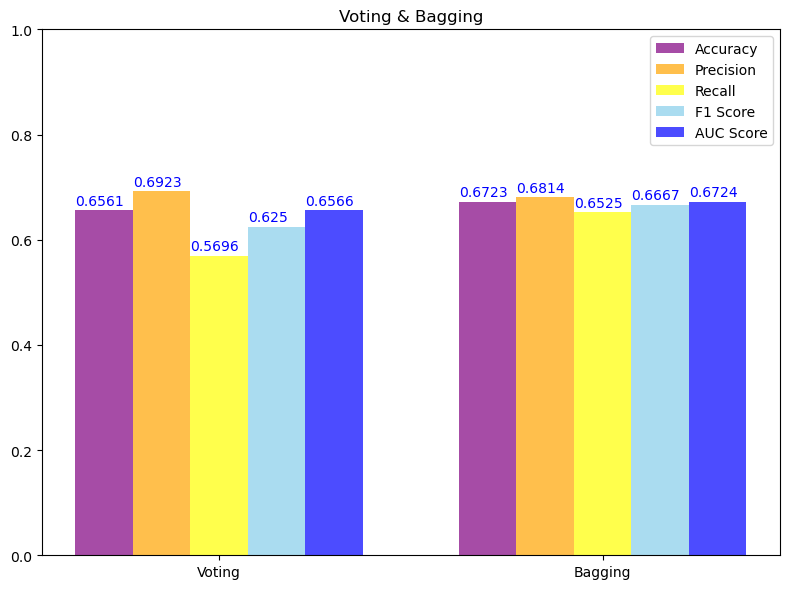

In [77]:
import matplotlib.pyplot as plt
import numpy as np

# 모델 이름과 해당 F1 스코어, AUC 스코어를 리스트로 저장
# model_names = ["Voting", "Bagging"]

# accuracy = [0.6561, 0.6723]
# precision = [0.6923, 0.6814]
# recall = [0.5696, 0.6525]
# f1_scores = [0.6250, 0.6667]
# auc_scores = [0.6566, 0.6724]

# # 그래프 설정
# fig, ax = plt.subplots(figsize=(8, 6))
# bar_width = 0.15
# index = np.arange(len(model_names))

# # accuracy 스코어 막대 그래프
# bar1 = ax.bar(index, accuracy, bar_width, label='Accuracy', color='red', alpha=0.7)
# for i, v in enumerate(accuracy):
#     ax.text(i - bar_width/2, v + 0.01, str(v), color='blue')
    
# # precision 스코어 막대 그래프
# bar2 = ax.bar(index, precision, bar_width, label='Precision', color='orange', alpha=0.7)
# for i, v in enumerate(precision):
#     ax.text(i - bar_width/2, v + 0.01, str(v), color='blue')
    
# # recall 스코어 막대 그래프
# bar3 = ax.bar(index, recall, bar_width, label='Recall', color='yellow', alpha=0.7)
# for i, v in enumerate(recall):
#     ax.text(i - bar_width/2, v + 0.01, str(v), color='blue')

# # F1 스코어 막대 그래프
# bar4 = ax.bar(index, f1_scores, bar_width, label='F1 Score', color='green', alpha=0.7)
# for i, v in enumerate(f1_scores):
#     ax.text(i - bar_width/2, v + 0.01, str(v), color='blue')

# # AUC 스코어 막대 그래프
# bar5 = ax.bar(index + bar_width, auc_scores, bar_width, label='AUC Score', color='blue', alpha=0.7)
# for i, v in enumerate(auc_scores):
#     ax.text(i + bar_width/2, v + 0.01, str(v), color='orange')

# # x축 레이블 설정
# ax.set_title('Voting & Bagging')
# ax.set_xticks(index + bar_width / 2)
# ax.set_xticklabels(model_names)

# # 범례 표시
# ax.legend()

# # y축 범위 설정
# ax.set_ylim(0.6, 0.8)

# plt.tight_layout()
# plt.show()

model_names = ["Voting", "Bagging"]

# 각 모델에 대한 스코어 데이터를 리스트로 저장
scores = {
    "Accuracy": [0.6561, 0.6723],
    "Precision": [0.6923, 0.6814],
    "Recall": [0.5696, 0.6525],
    "F1 Score": [0.6250, 0.6667],
    "AUC Score": [0.6566, 0.6724]
}

# 그래프 설정
fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.15
index = np.arange(len(model_names))

# 각 스코어에 대해 반복하여 막대 그래프 생성
colors = ['purple', 'orange', 'yellow', 'skyblue', 'blue']
for i, (score_label, score_values) in enumerate(scores.items()):
    bars = ax.bar(index + i * bar_width, score_values, bar_width, label=score_label, color=colors[i], alpha=0.7)
    for j, v in enumerate(score_values):
        ax.text(index[j] + i * bar_width - bar_width/2, v + 0.01, str(v), color='blue')

# x축 레이블 설정
ax.set_title('Voting & Bagging')
ax.set_xticks(index + bar_width * (len(scores) - 1) / 2)
ax.set_xticklabels(model_names)

# 범례 표시
ax.legend()

# y축 범위 설정
ax.set_ylim(0, 1)

plt.tight_layout()
plt.show()